In [2]:
import pandas as pd
import numpy as np


In [51]:
import warnings
warnings.filterwarnings("ignore")


In [52]:

pd.set_option('display.max_columns', None)

In [13]:
from datetime import datetime


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df=pd.read_csv('AccidentesAviones.csv')

In [8]:
df

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,5003,"March 28, 2021",1835,"Near Butte, Alaska",Soloy Helicopters,?,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,4598,6,5,1,5,4,1,0,The sightseeing helicopter crashed after missi...
5004,5004,"May 21, 2021",1800,"Near Kaduna, Nigeria",Military - Nigerian Air Force,?,?,Beechcraft B300 King Air 350i,NAF203,FL-891,11,7,4,11,7,4,0,"While on final approach, in poor weather condi..."
5005,5005,"June 10, 2021",0800,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,?,Naypyidaw - Anisakan,Beechcraft 1900D,4610,E-325,14,12,2,12,11,1,0,The plane was carrying military personnel and ...
5006,5006,"July 04, 2021",11:30,"Patikul, Sulu, Philippines",Military - Philippine Air Force,?,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,5125,96,88,8,50,?,?,3,"While attempting to land at Jolo Airport, the ..."


Voy a trabajar con una copia de l dataset para evitar hacerle cambios al original



In [165]:
df1=df.copy()

In [48]:
from datetime import datetime


In [50]:
def convertir_a_fecha(fecha_timestamp):
    fecha_str = fecha_timestamp.strftime("%B %d, %Y")
    return datetime.strptime(fecha_str, "%B %d, %Y")

# Aplicar la función a la columna 'fecha'
df1['fecha'] = df1['fecha'].apply(convertir_a_fecha)

In [167]:
def convertir_a_hora(hora_str):
    if hora_str == "?":
        return None
    try:
        return datetime.strptime(hora_str, "%H%M").time()
    except ValueError:
        return None

# Aplicar la función a la columna 'HORA'
df1['HORA declarada'] = df1['HORA declarada'].apply(convertir_a_hora)

In [168]:
df1.drop(columns='Unnamed: 0',inplace=True)

In [169]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   fecha                   5008 non-null   datetime64[ns]
 1   HORA declarada          3287 non-null   object        
 2   Ruta                    5008 non-null   object        
 3   OperadOR                5008 non-null   object        
 4   flight_no               5008 non-null   object        
 5   route                   5007 non-null   object        
 6   ac_type                 5008 non-null   object        
 7   registration            5008 non-null   object        
 8   cn_ln                   5008 non-null   object        
 9   all_aboard              5008 non-null   object        
 10  PASAJEROS A BORDO       5008 non-null   object        
 11  crew_aboard             5008 non-null   object        
 12  cantidad de fallecidos  5008 non-null   object  

In [170]:
df1.describe()



,fecha
count,5008
mean,1971-05-14 09:57:13.226837072
min,1908-09-17 00:00:00
25%,1951-05-07 12:00:00
50%,1970-09-02 12:00:00
75%,1992-03-22 12:00:00
max,2021-07-06 00:00:00


contar valores unicos

In [97]:
df1.nunique()



fecha                     4577
HORA declarada            1036
Ruta                      4125
OperadOR                  2268
flight_no                  893
route                     3838
ac_type                   2469
registration              4701
cn_ln                     3908
all_aboard                 245
PASAJEROS A BORDO          235
crew_aboard                 35
cantidad de fallecidos     200
passenger_fatalities       191
crew_fatalities             29
ground                      52
summary                   4858
dtype: int64

Contar cantidad de nulos

In [98]:
df1.isnull().sum()


fecha                        0
HORA declarada            1721
Ruta                         0
OperadOR                     0
flight_no                    0
route                        1
ac_type                      0
registration                 0
cn_ln                        0
all_aboard                   0
PASAJEROS A BORDO            0
crew_aboard                  0
cantidad de fallecidos       0
passenger_fatalities         0
crew_fatalities              0
ground                       0
summary                      0
dtype: int64

Cuantos hay de cada operador

In [171]:
df1['OperadOR'].value_counts()


OperadOR
Aeroflot                            253
Military - U.S. Air Force           141
Air France                           74
Deutsche Lufthansa                   63
United Air Lines                     44
                                   ... 
Sierra Pacific Airlines               1
Pathet Lao Airlines                   1
Military - West German Air Force      1
Cessnyca                              1
Kamchatka Aviation Enterprise         1
Name: count, Length: 2268, dtype: int64

con esto reviso si el Dataframe cuenta con filas duplicadas


In [172]:
duplicados = df1[df1.duplicated(keep='first')]
print("Filas duplicadas:")
print(duplicados)
print(f"Total de filas duplicadas: {len(duplicados)}")


Filas duplicadas:
Empty DataFrame
Columns: [fecha, HORA declarada, Ruta, OperadOR, flight_no, route, ac_type, registration, cn_ln, all_aboard, PASAJEROS A BORDO, crew_aboard, cantidad de fallecidos, passenger_fatalities, crew_fatalities, ground, summary]
Index: []
Total de filas duplicadas: 0


reemplazo los signos de pregunta por nulos exepto en la columna summary 

In [173]:
def replace_question_mark(value):
    return None if value == "?" else value

# Aplicar la función a todas las columnas excepto "summary"
columns_to_replace = df1.columns.difference(['summary'])
df1[columns_to_replace] = df1[columns_to_replace].applymap(replace_question_mark)


Los valores faltantes

In [174]:
valores_nulos = df1.isnull()
print("Valores nulos por columna:")
print(valores_nulos.sum())


Valores nulos por columna:
fecha                        0
HORA declarada            1721
Ruta                         5
OperadOR                    10
flight_no                 3682
route                      763
ac_type                     13
registration               272
cn_ln                      667
all_aboard                  17
PASAJEROS A BORDO          221
crew_aboard                219
cantidad de fallecidos       8
passenger_fatalities       235
crew_fatalities            235
ground                      44
summary                      0
dtype: int64


En el siguiente grafico podemos ver el porcentaje de nulos en cada columna

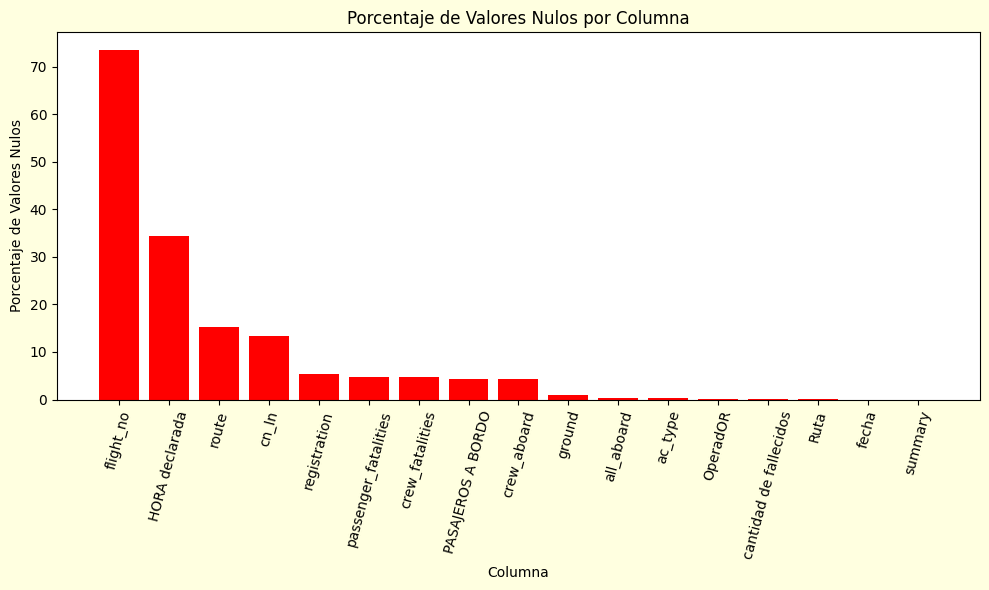

In [103]:
data = {
    'Columna': df1.columns,
    'Valores Nulos': df1.isnull().sum(),
    'Porcentaje Nulos': (df1.isnull().sum() / len(df1)) * 100
}

# Crear un DataFrame a partir del diccionario
df_nulos = pd.DataFrame(data)

# Ordenar el DataFrame por la cantidad de valores nulos en orden descendente
df_nulos = df_nulos.sort_values(by='Valores Nulos', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6), facecolor='lightyellow')
plt.bar(df_nulos['Columna'], df_nulos['Porcentaje Nulos'], color=['red' if val > 0 else 'green' for val in df_nulos['Valores Nulos']])
plt.xticks(rotation=75)
plt.xlabel('Columna')
plt.ylabel('Porcentaje de Valores Nulos')
plt.title('Porcentaje de Valores Nulos por Columna')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Intente meter con la informacion del mismo dataframe rellenar la columna all_aboard para evitar que halla nulos

In [175]:
df1['crew_aboard'] = pd.to_numeric(df1['crew_aboard'], errors='coerce')  # Convertir a numérico con valores no numéricos como NaN
df1['PASAJEROS A BORDO'] = pd.to_numeric(df1['PASAJEROS A BORDO'], errors='coerce')

# Luego, rellenar los nulos en 'all_aboard' con la suma de 'crew_aboard' y 'PASAJEROS A BORDO' si ambos valores no son nulos
df1['all_aboard'] = df1.apply(lambda row: row['crew_aboard'] + row['PASAJEROS A BORDO'] if not pd.isna(row['crew_aboard']) and not pd.isna(row['PASAJEROS A BORDO']) else row['all_aboard'], axis=1)

No vario

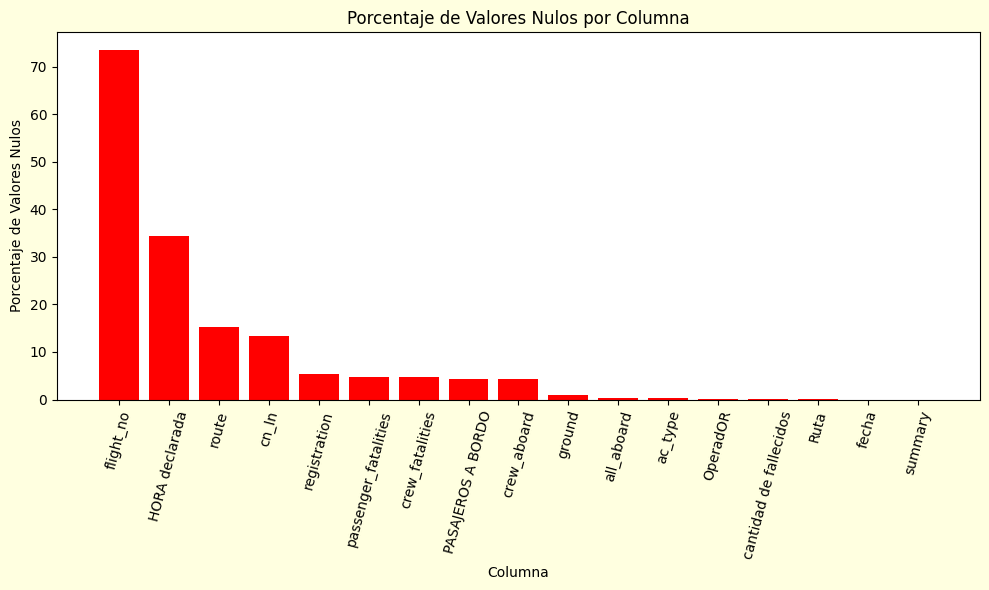

In [105]:
data = {
    'Columna': df1.columns,
    'Valores Nulos': df1.isnull().sum(),
    'Porcentaje Nulos': (df1.isnull().sum() / len(df1)) * 100
}

# Crear un DataFrame a partir del diccionario
df_nulos = pd.DataFrame(data)

# Ordenar el DataFrame por la cantidad de valores nulos en orden descendente
df_nulos = df_nulos.sort_values(by='Valores Nulos', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6), facecolor='lightyellow')
plt.bar(df_nulos['Columna'], df_nulos['Porcentaje Nulos'], color=['red' if val > 0 else 'green' for val in df_nulos['Valores Nulos']])
plt.xticks(rotation=75)
plt.xlabel('Columna')
plt.ylabel('Porcentaje de Valores Nulos')
plt.title('Porcentaje de Valores Nulos por Columna')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [176]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   fecha                   5008 non-null   datetime64[ns]
 1   HORA declarada          3287 non-null   object        
 2   Ruta                    5003 non-null   object        
 3   OperadOR                4998 non-null   object        
 4   flight_no               1326 non-null   object        
 5   route                   4245 non-null   object        
 6   ac_type                 4995 non-null   object        
 7   registration            4736 non-null   object        
 8   cn_ln                   4341 non-null   object        
 9   all_aboard              4991 non-null   object        
 10  PASAJEROS A BORDO       4787 non-null   float64       
 11  crew_aboard             4789 non-null   float64       
 12  cantidad de fallecidos  5000 non-null   object  

Pasar columnas a Valores enteros

In [177]:
columnas_a_entero = ['all_aboard', 'PASAJEROS A BORDO', 'crew_aboard']

for columna in columnas_a_entero:
    df1[columna] = pd.to_numeric(df1[columna], errors='coerce', downcast='integer')


In [178]:
lista=df1.columns.to_list()

In [179]:
lista

['fecha',
 'HORA declarada',
 'Ruta',
 'OperadOR',
 'flight_no',
 'route',
 'ac_type',
 'registration',
 'cn_ln',
 'all_aboard',
 'PASAJEROS A BORDO',
 'crew_aboard',
 'cantidad de fallecidos',
 'passenger_fatalities',
 'crew_fatalities',
 'ground',
 'summary']

Normalizo los nombres de las columnas a español y en minuscula sin tildes


In [180]:

# Supongamos que tienes un DataFrame llamado df1 con las columnas existentes
columnas_a_renombrar = ['fecha', 'HORA declarada', 'Ruta', 'OperadOR', 'flight_no', 'route', 'ac_type', 'registration', 'cn_ln', 'all_aboard', 'PASAJEROS A BORDO', 'crew_aboard', 'cantidad de fallecidos', 'passenger_fatalities', 'crew_fatalities', 'ground', 'summary']

# Crear un diccionario de mapeo de nombres de columna en español
nuevo_nombre_columnas = {
    'fecha': 'fecha',
    'HORA declarada': 'hora',
    'Ruta': 'ruta',
    'OperadOR': 'operador_aéreo',
    'flight_no': 'número_de_vuelo',
    'route': 'itineraio',
    'ac_type': 'tipo_de_aeronave',
    'registration': 'registro_de_aeronave',
    'cn_ln': 'número_de_construcción',
    'all_aboard': 'total_a_bordo',
    'PASAJEROS A BORDO': 'pasajeros_a_bordo',
    'crew_aboard': 'tripulación_a_bordo',
    'cantidad de fallecidos': 'total_de_fallecidos',
    'passenger_fatalities': 'fallecidos_pasajeros',
    'crew_fatalities': 'fallecidos_tripulación',
    'ground': 'fallecidos_en_tierra',
    'summary': 'resumen'
}

# Renombrar las columnas en el DataFrame
df1.rename(columns=nuevo_nombre_columnas, inplace=True)

# Ver el DataFrame resultante
df1.head()


,fecha,hora,ruta,operador_aéreo,número_de_vuelo,itineraio,tipo_de_aeronave,registro_de_aeronave,número_de_construcción,total_a_bordo,pasajeros_a_bordo,tripulación_a_bordo,total_de_fallecidos,fallecidos_pasajeros,fallecidos_tripulación,fallecidos_en_tierra,resumen
0,1908-09-17,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,None,Demonstration,Wright Flyer III,None,1,2.0,1.0,1.0,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,None,"Juvisy-sur-Orge, France",None,None,Air show,Wright Byplane,SC1,None,1.0,0.0,1.0,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,1912-07-12,06:30:00,"Atlantic City, New Jersey",Military - U.S. Navy,None,Test flight,Dirigible,None,None,5.0,0.0,5.0,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,1913-08-06,None,"Victoria, British Columbia, Canada",Private,None,None,Curtiss seaplane,None,None,1.0,0.0,1.0,1,0,1,0,The first fatal airplane accident in Canada oc...
4,1913-09-09,18:30:00,Over the North Sea,Military - German Navy,None,None,Zeppelin L-1 (airship),None,None,20.0,NaN,NaN,14,None,None,0,The airship flew into a thunderstorm and encou...


In [181]:
valores_unicos = df1['hora'].unique()

# Recorremos los valores únicos
for valor in valores_unicos:
    print(valor)

17:18:00
None
06:30:00
18:30:00
10:30:00
01:00:00
15:20:00
23:45:00
05:15:00
08:45:00
07:00:00
07:45:00
21:30:00
10:00:00
16:55:00
12:15:00
17:40:00
11:40:00
13:15:00
16:45:00
13:42:00
17:30:00
05:30:00
09:30:00
15:27:00
08:00:00
08:30:00
04:05:00
17:00:00
11:45:00
11:30:00
21:00:00
11:01:00
18:00:00
10:10:00
09:35:00
22:40:00
13:00:00
10:45:00
23:30:00
22:30:00
09:00:00
08:40:00
20:00:00
04:00:00
06:48:00
05:45:00
19:30:00
12:00:00
00:10:00
06:00:00
20:07:00
12:30:00
07:40:00
15:00:00
03:15:00
15:40:00
11:20:00
22:35:00
16:00:00
18:15:00
14:15:00
05:00:00
11:00:00
09:50:00
22:45:00
10:50:00
23:42:00
07:30:00
03:33:00
02:52:00
19:00:00
00:45:00
15:18:00
03:30:00
18:35:00
22:25:00
14:36:00
09:40:00
14:20:00
20:18:00
20:08:00
23:00:00
09:55:00
02:19:00
19:40:00
04:40:00
19:15:00
19:32:00
03:52:00
19:10:00
10:20:00
05:20:00
22:00:00
03:00:00
14:00:00
03:38:00
10:47:00
03:14:00
03:23:00
20:47:00
19:38:00
11:07:00
20:50:00
13:40:00
18:40:00
19:25:00
10:40:00
12:25:00
04:23:00
16:50:00
15:30

In [182]:
df1

,fecha,hora,ruta,operador_aéreo,número_de_vuelo,itineraio,tipo_de_aeronave,registro_de_aeronave,número_de_construcción,total_a_bordo,pasajeros_a_bordo,tripulación_a_bordo,total_de_fallecidos,fallecidos_pasajeros,fallecidos_tripulación,fallecidos_en_tierra,resumen
0,1908-09-17,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,None,Demonstration,Wright Flyer III,None,1,2.0,1.0,1.0,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,None,"Juvisy-sur-Orge, France",None,None,Air show,Wright Byplane,SC1,None,1.0,0.0,1.0,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,1912-07-12,06:30:00,"Atlantic City, New Jersey",Military - U.S. Navy,None,Test flight,Dirigible,None,None,5.0,0.0,5.0,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,1913-08-06,None,"Victoria, British Columbia, Canada",Private,None,None,Curtiss seaplane,None,None,1.0,0.0,1.0,1,0,1,0,The first fatal airplane accident in Canada oc...
4,1913-09-09,18:30:00,Over the North Sea,Military - German Navy,None,None,Zeppelin L-1 (airship),None,None,20.0,NaN,NaN,14,None,None,0,The airship flew into a thunderstorm and encou...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,2021-03-28,18:35:00,"Near Butte, Alaska",Soloy Helicopters,None,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,4598,6.0,5.0,1.0,5,4,1,0,The sightseeing helicopter crashed after missi...
5004,2021-05-21,18:00:00,"Near Kaduna, Nigeria",Military - Nigerian Air Force,None,None,Beechcraft B300 King Air 350i,NAF203,FL-891,11.0,7.0,4.0,11,7,4,0,"While on final approach, in poor weather condi..."
5005,2021-06-10,08:00:00,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,None,Naypyidaw - Anisakan,Beechcraft 1900D,4610,E-325,14.0,12.0,2.0,12,11,1,0,The plane was carrying military personnel and ...
5006,2021-07-04,None,"Patikul, Sulu, Philippines",Military - Philippine Air Force,None,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,5125,96.0,88.0,8.0,50,None,None,3,"While attempting to land at Jolo Airport, the ..."


In [183]:
df1['ruta'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5008 entries, 0 to 5007
Series name: ruta
Non-Null Count  Dtype 
--------------  ----- 
5003 non-null   object
dtypes: object(1)
memory usage: 39.2+ KB


In [184]:
valores_unicos_ruta = df1['ruta'].unique()



In [185]:
valores_unicos_ruta 


array(['Fort Myer, Virginia', 'Juvisy-sur-Orge, France',
       'Atlantic City, New Jersey', ..., 'Near Pyin Oo Lwin, Myanmar',
       'Patikul, Sulu, Philippines', 'Palana, Russia'], dtype=object)

In [186]:
df1.ruta.nunique()

4124

reemplazo los datos vacios de 'ruta' con un espacio en blacno


In [187]:
# Reemplazamos los valores nulos por un valor vacío
df1['ruta'] = df1['ruta'].fillna('')

# Reemplazamos los valores de ? por un valor vacío
df1['ruta'] = df1['ruta'].str.replace('?', '')

Lista de los paises del mundo

In [188]:
lista_paises = [
    "Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "Antigua and Barbuda", "Argentina", "Armenia",
    "Australia", "Austria", "Azerbaijan", "Bahamas", "Bahrain", "Bangladesh", "Barbados", "Belarus", "Belgium",
    "Belize", "Benin", "Bhutan", "Bolivia", "Bosnia and Herzegovina", "Botswana", "Brazil", "Brunei", "Bulgaria",
    "Burkina Faso", "Burundi", "Côte d'Ivoire", "Cabo Verde", "Cambodia", "Cameroon", "Canada",
    "Central African Republic", "Chad", "Chile", "China", "Colombia", "Comoros", "Congo", "Costa Rica", "Croatia",
    "Cuba", "Cyprus", "Czech Republic", "Democratic Republic of the Congo", "Denmark", "Djibouti", "Dominica",
    "Dominican Republic", "Ecuador", "England", "Egypt", "El Salvador", "Equatorial Guinea", "Eritrea", "Estonia",
    "Eswatini", "Ethiopia", "Fiji", "Finland", "France", "Gabon", "Gambia", "Georgia", "Germany", "Ghana", "Greece",
    "Grenada", "Guatemala", "Guinea", "Guinea-Bissau", "Guyana", "Haiti", "Holy See", "Honduras", "Hungary",
    "Iceland", "India", "Indonesia", "Iran", "Iraq", "Ireland", "Israel", "Italy","Ivory Coast", "Jamaica", "Japan", "Jordan",
    "Kazakhstan", "Kenya", "Kiribati", "Kuwait", "Kyrgyzstan", "Laos", "Latvia", "Lebanon", "Lesotho", "Liberia",
    "Libya", "Liechtenstein", "Lithuania", "Luxembourg", "Madagascar", "Malawi", "Malaysia", "Maldives", "Mali",
    "Malta", "Marshall Islands", "Mauritania", "Mauritius", "Mexico", "Micronesia", "Moldova", "Monaco", "Mongolia",
    "Montenegro", "Morocco", "Mozambique", "Myanmar", "Namibia", "Nauru", "Nepal", "Netherlands", "New Zealand",
    "Nicaragua", "Nigeria", "Niger", "North Korea", "North Macedonia", "Norway", "Oman", "Pakistan", "Palau",
    "Palestine State", "Panama", "Papua", "Papua New Guinea", "Paraguay", "Peru", "Philippines", "Poland", "Portugal", "Puerto Rico",
    "Qatar", "Romania", "Russia", "Rwanda", "Saint Kitts and Nevis", "Saint Lucia",
    "Saint Vincent and the Grenadines", "Samoa", "San Marino", "Sao Tome and Principe", "Saudi Arabia", "Senegal", "Scotland",
    "Serbia", "Seychelles", "Sierra Leone", "Singapore", "Slovakia", "Slovenia", "Solomon Islands", "Somalia",
    "South Africa", "South Korea", "South Sudan", "Spain", "Sri Lanka", "Sudan", "Suriname", "Sweden", "Switzerland",
    "Syria", "Tajikistan", "Taiwan", "Tanzania", "Thailand", "Timor-Leste", "Togo", "Tonga", "Trinidad and Tobago",
    "Tunisia", "Turkey", "Turkmenistan", "Tuvalu", "Uganda", "Ukraine", "United Arab Emirates", "United Kingdom",
    "United States", "Uruguay", "USSR", "Uzbekistan", "Vanuatu", "Venezuela", "Vietnam", "Yemen", "Zambia", "Zimbabwe"
]

Obtengo el nombre del los paises con base a los de la lista

In [189]:
def obtener_pais(location):
    for pais in lista_paises:
        if pais.lower() in location.lower():
            return pais
    return 'otro'

# Aplicamos la función 'obtener_pais' a la columna 'location' y creamos la columna 'country'
df1['pais'] = df1['ruta'].apply(lambda x: obtener_pais(x) if x else 'otro')

Los gloriosos estados de USA

In [190]:
estados_usa = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida",
    "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine",
    "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska",
    "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio",
    "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas",
    "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"
]

# Reemplazamos en  'pais' el valor 'other' por 'United States' si 'ruta' contiene un estado de los Estados Unidos
df1.loc[df1['ruta'].str.contains('|'.join(estados_usa), case=False, na=False), 'pais'] = 'United States'

Separo con base a si en la columna del resumen donde se menciona los detalles del accidente se menciona algun cuerpo de agua

In [191]:
import re

# Definimos una función para asignar valores a la columna 'surface'
def assign_surface(location):
    if re.search(r'\bsea\b|\bocean\b|\briver\b|\bchannel\b|\bover\b', location, flags=re.IGNORECASE):
        return 'agua'
    else:
        return 'tierra'

# Creamos la columna 'surface' para identificar vuelos con accidentes en tierra o mar
df1['superficie'] = df1['resumen'].apply(assign_surface)

In [192]:
df1['ruta'] = df1['ruta'].astype(str)

In [193]:
df1.pais.unique()

array(['United States', 'France', 'Canada', 'other', 'Germany', 'Belgium',
       'England', 'Denmark', 'Italy', 'Spain', 'Australia', 'China',
       'Morocco', 'United Kingdom', 'Oman', 'Russia', 'Colombia',
       'Hungary', 'Mauritania', 'Slovakia', 'Algeria', 'Finland',
       'Uruguay', 'Brazil', 'Netherlands', 'Greece', 'Mexico', 'Cuba',
       'Iran', 'Madagascar', 'Argentina', 'New Zealand', 'Bulgaria',
       'South Africa', 'Thailand', 'Iraq', 'Chile', 'Lebanon', 'Bolivia',
       'Ukraine', 'Peru', 'Syria', 'otro', 'Pakistan', 'Egypt',
       'Honduras', 'Switzerland', 'Panama', 'Poland', 'Sweden', 'Norway',
       'Croatia', 'Tajikistan', 'Libya', 'Gambia', 'Guinea', 'Sudan',
       'Samoa', 'India', 'Tanzania', 'Kenya', 'Japan', 'Mozambique',
       'Ecuador', 'Malta', 'Indonesia', 'Scotland', 'Estonia',
       'Puerto Rico', 'Turkmenistan', 'Kazakhstan', 'Austria', 'Portugal',
       'Guyana', 'Ireland', 'Nicaragua', 'Ivory Coast', 'Philippines',
       'Bahamas', 'Liber

In [194]:
df1.pais.nunique()

165

In [141]:
df

los paises con mas accidentes

In [195]:
# Agrupamos los datos por país y sumamos la cantidad de accidentes
accidentes_por_pais = df1.groupby('pais')['fecha'].count()

# Excluimos el valor 'other'
accidentes_por_pais = accidentes_por_pais.drop('otro', errors='ignore')

# Obtenemos el top 10 de países por accidentes
top_10_paises = accidentes_por_pais.nlargest(10)
top_10_paises


pais
United States    1037
other             336
Russia            255
Brazil            176
Colombia          150
Canada            133
France            129
India             112
England           101
Indonesia          99
Name: fecha, dtype: int64

Aca vemos cuantos acciddentes ocurren en Lugares que no estan en la lista, son un numero chico

In [199]:
df1

,fecha,hora,ruta,operador_aéreo,número_de_vuelo,itineraio,tipo_de_aeronave,registro_de_aeronave,número_de_construcción,total_a_bordo,pasajeros_a_bordo,tripulación_a_bordo,total_de_fallecidos,fallecidos_pasajeros,fallecidos_tripulación,fallecidos_en_tierra,resumen,pais,superficie
0,1908-09-17,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,None,Demonstration,Wright Flyer III,None,1,2.0,1.0,1.0,1,1,0,0,"During a demonstration flight, a U.S. Army fly...",United States,tierra
1,1909-09-07,None,"Juvisy-sur-Orge, France",None,None,Air show,Wright Byplane,SC1,None,1.0,0.0,1.0,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...,France,tierra
2,1912-07-12,06:30:00,"Atlantic City, New Jersey",Military - U.S. Navy,None,Test flight,Dirigible,None,None,5.0,0.0,5.0,5,0,5,0,First U.S. dirigible Akron exploded just offsh...,United States,tierra
3,1913-08-06,None,"Victoria, British Columbia, Canada",Private,None,None,Curtiss seaplane,None,None,1.0,0.0,1.0,1,0,1,0,The first fatal airplane accident in Canada oc...,Canada,tierra
4,1913-09-09,18:30:00,Over the North Sea,Military - German Navy,None,None,Zeppelin L-1 (airship),None,None,20.0,NaN,NaN,14,None,None,0,The airship flew into a thunderstorm and encou...,other,agua
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,2021-03-28,18:35:00,"Near Butte, Alaska",Soloy Helicopters,None,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,4598,6.0,5.0,1.0,5,4,1,0,The sightseeing helicopter crashed after missi...,United States,tierra
5004,2021-05-21,18:00:00,"Near Kaduna, Nigeria",Military - Nigerian Air Force,None,None,Beechcraft B300 King Air 350i,NAF203,FL-891,11.0,7.0,4.0,11,7,4,0,"While on final approach, in poor weather condi...",Nigeria,tierra
5005,2021-06-10,08:00:00,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,None,Naypyidaw - Anisakan,Beechcraft 1900D,4610,E-325,14.0,12.0,2.0,12,11,1,0,The plane was carrying military personnel and ...,Myanmar,tierra
5006,2021-07-04,None,"Patikul, Sulu, Philippines",Military - Philippine Air Force,None,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,5125,96.0,88.0,8.0,50,None,None,3,"While attempting to land at Jolo Airport, the ...",Philippines,tierra


In [201]:
conteo_otro = (df1['pais'] == 'otro').sum()
print(conteo_otro)

341


In [202]:
filas_otro_tierra = df1[(df1['pais'] == 'otro') & (df1['superficie'] == 'tierra')]



vemos que muchas dependen no coiciden por los idiomas o nombres complicados, e incluso errores de tipeo, no vale la pena el trabajo que requiere por 253 filas

In [147]:
filas_otro_tierra

,fecha,hora,ruta,operador_aéreo,número_de_vuelo,itineraio,tipo_de_aeronave,registro_de_aeronave,número_de_construcción,total_a_bordo,pasajeros_a_bordo,tripulación_a_bordo,total_de_fallecidos,fallecidos_pasajeros,fallecidos_tripulación,fallecidos_en_tierra,resumen,pais,superficie
16,1917-06-14,08:45:00,"Off Vlieland Island, North Sea",Military - German Navy,None,None,Zeppelin L-43 (airship),None,None,24.0,NaN,NaN,24,None,None,0,Shot down by British aircraft.,otro,tierra
22,1918-08-11,10:00:00,"Ameland Island, North Sea",Military - German Navy,None,None,Zeppelin L-53 (airship),None,None,19.0,NaN,NaN,19,None,None,0,Shot down by british aircraft.,otro,tierra
32,1919-12-11,None,"Catherham, Surrey, UK",Aircraft Travel Transport,None,Paris - Hounslow,de Havilland DH-4,G-EAHF,None,2.0,1.0,1.0,1,1,1,0,Crashed in a field while attemptting to land.,otro,tierra
39,1920-07-20,None,"Cartagena, Columbia",Compañia Colombiana de Navegación Aérea,None,None,Farman F-40,None,None,2.0,1.0,1.0,1,1,1,0,Crashed while taking off after engine failure....,otro,tierra
51,1921-02-03,None,"Mendotta, Minnisota",US Aerial Mail Service,None,None,De Havilland DH-4,130,None,1.0,0.0,1.0,1,0,1,0,Shortly after takeoff from Minneapolis-World C...,otro,tierra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4879,2013-11-29,13:30:00,"Bwabwata National Park, Nambia",Mozambique Airline,470,"Maputo, Mozambique - Luanda, Angola",Embraer ERJ-190AR,C9-EMC,19000581,33.0,27.0,6.0,33,27,6,0,The airliner crashed into Bwabwata National Pa...,otro,tierra
4904,2014-12-28,06:18:00,Java Sea,AirAsia,8501,Surabaya - Singapore,Airbus A-320-216,PK-AXC,3648,162.0,155.0,7.0,162,155,7,0,The aircraft went missing while en route from ...,otro,tierra
4954,2017-07-10,16:00:00,"Near Itta Bena, Mississipi",USMC,None,"Cherry Point, NC - El Centro, CA",Lockheed KC-130T Hercules,165000,382-5303,16.0,14.0,2.0,16,14,2,0,"While en route, the Marine Corps transport suf...",otro,tierra
4959,2017-12-13,18:15:00,"Near Fond-du-Lac, Saskatchewan",West Wind Aviation,None,Fond-du-Lac - Stony Rapids,ATR42-320,C-GWEA,240,25.0,22.0,3.0,1,1,0,0,"Shortly after taking off, the aircraft lost al...",otro,tierra


Separamos entre militares y civiles

In [203]:

militar = ['Military', 'Air Force', 'Army']
pattern = '|'.join(militar)


df1['categoria'] = np.where(df1['operador_aéreo'].str.contains('|'.join(militar), case=False), 'militar', 'civil')

no pueden haber nombres con tildes, son un re problema

In [211]:
from unidecode import unidecode

# Supongamos que tienes un DataFrame llamado df1 con las columnas originales
# y deseas eliminar las tildes de los nombres de las columnas

# Diccionario de mapeo de nombres de columnas
mapeo_nombres_sin_tildes = {nombre: unidecode(nombre) for nombre in df1.columns}

# Cambiar los nombres de las columnas en el DataFrame original
df1.rename(columns=mapeo_nombres_sin_tildes, inplace=True)

In [214]:
tipo_de_vuelos = df1['categoria'].value_counts()
tipo_de_vuelos

categoria
civil      4217
militar     791
Name: count, dtype: int64

In [157]:
valores_unicos = df1['numero_de_vuelo'].unique()

# Recorremos los valores únicos
for valor in valores_unicos:
    print(valor)

None
F-AIKG
7
599
6
4
1
14
34
23
15A
LZ 129
2
8
9
229
19
16
21
3
203
5
71
7208
28
V-1104
9035
777
63
218
-
13
161
6001
142
45
216
42
105
16B
6-103
513
878
850
942
404
44
115
140
48
6963
2207
665
521
605
410
121
311
608
1629
923
10
009
572
611
700
4422
1-10
624
343
072
421
331
060
6427
100
897R
557
11-8
537
157
500
307
2501
903
32
245
83
493
129
151
610
615
CAM5763
44-2
501
324
6780
101
4-2
526A
416W
202
251
201
376
841
1-6-6A
470
162
636
783/057
318
18
512
723
627
783
304/44
270
781
314
152
971
633
136
57
792
451
4844-C
329
260
626
591
711
845/26
560
402/46
476
214
24
409
629
17K
976
642
400
253
718 / 2
304
190
701
943
810-9
327
823
411
1800
111
232
844
39
103
285
11
609
543
67
222
736
205
300
607E
258
164
495
466
308
502
601
320
402
75
983
891
514
542
200
1349
1658
315
967
595
371
233
330
2511
20
871
671
710
901
503
207
538
1-11
372
613
698
36
804
830/18
738
375
0005
104
26
081
826/266
S85
651
401
424
548
210
406
897
381
859
511
529
2005
706
201/8
92
153
739/14
7816
56
007
117
902
40


In [218]:
df1.head(1)

,fecha,hora,ruta,operador_aereo,numero_de_vuelo,itineraio,tipo_de_aeronave,registro_de_aeronave,numero_de_construccion,total_a_bordo,pasajeros_a_bordo,tripulacion_a_bordo,total_de_fallecidos,fallecidos_pasajeros,fallecidos_tripulacion,fallecidos_en_tierra,resumen,pais,superficie,categoria
0,1908-09-17,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,None,Demonstration,Wright Flyer III,None,1,2.0,1.0,1.0,1,1,0,0,"During a demonstration flight, a U.S. Army fly...",United States,tierra,militar


In [219]:
# Analizamos las aeronaves
df1.tipo_de_aeronave.unique()

array(['Wright Flyer III', 'Wright Byplane', 'Dirigible', ...,
       'Eurocopter AS350B3\xa0Ecureuil', 'Beechcraft B300 King Air 350i',
       'Antonov An 26B-100'], dtype=object)

In [220]:
df1.tipo_de_aeronave.nunique()

2468

hay 13 aeronaves que no se saben que son

In [221]:
df1.tipo_de_aeronave.isna().sum()

13

In [224]:
# Filtrar las filas donde 'tipo_de_aeronave' es nulo
filas_tipo_aeronave_nula = df1[df1['tipo_de_aeronave'].isnull()]



In [223]:
filas_tipo_aeronave_nula



,fecha,hora,ruta,operador_aereo,numero_de_vuelo,itineraio,tipo_de_aeronave,registro_de_aeronave,numero_de_construccion,total_a_bordo,pasajeros_a_bordo,tripulacion_a_bordo,total_de_fallecidos,fallecidos_pasajeros,fallecidos_tripulacion,fallecidos_en_tierra,resumen,pais,superficie,categoria
67,1922-04-08,None,"Pao Ting Fou, China",None,None,Test,None,None,None,17.0,0.0,17.0,17,0,17,0,Aboard were all workers taking part in a fligh...,China,tierra,civil
376,1935-05-29,None,"San Barbra, Honduras",None,None,None,None,None,None,9.0,NaN,NaN,6,None,None,0,Crashed into the Ulua River.,Honduras,agua,civil
624,1941-12-11,None,"Miami, Florida",Pan American Airways,None,None,None,NC21V,None,3.0,NaN,NaN,3,None,None,0,?,United States,tierra,civil
701,1943-11-08,None,"Poona, India",Military - Indian Air Force,None,None,None,None,None,1.0,NaN,NaN,1,None,None,37,Crashed into a village.,India,tierra,militar
754,1944-11-09,None,"Seljord, Norway",Military - U.S. Army Air Corps,None,None,None,42-52196,None,NaN,NaN,NaN,None,None,None,None,?,Norway,tierra,militar
796,1945-06-29,None,"Bangalore, India",Military - Royal Indian Air Force,None,None,None,None,None,2.0,NaN,NaN,2,None,None,36,Crashed into a village exploding and destoying...,India,tierra,militar
853,1946-03-17,None,"Near Nanking, China",Military - Chinese Air Force,None,Shanghai - Nanking,None,None,None,20.0,NaN,NaN,20,None,None,0,Crashed into mountainous terrain in low visibi...,China,tierra,militar
854,1946-03-18,None,"Between Chungking and Shanghai, China",China National Aviation Corporation,None,Chunking - Shanghai,None,139,None,NaN,NaN,NaN,None,None,None,None,Disappeared while en route. Plane never located.,China,tierra,civil
859,1946-04-08,None,"Near Shensi, China",None,None,Shensi - Yenan,None,None,None,14.0,11.0,3.0,14,11,3,0,?,China,tierra,civil
1268,1951-08-08,21:00:00,"Barilla Bay, Australia",Trans Australia Airlines,None,Hobart Melbourne,None,VH-TAT,13083,2.0,0.0,2.0,2,0,2,0,Cargo plane. Loss of lateral control during a ...,Australia,tierra,civil


In [238]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   fecha                   5008 non-null   datetime64[ns]
 1   hora                    3287 non-null   object        
 2   ruta                    5008 non-null   object        
 3   operador_aereo          4998 non-null   object        
 4   numero_de_vuelo         1326 non-null   object        
 5   itineraio               4245 non-null   object        
 6   tipo_de_aeronave        4995 non-null   object        
 7   registro_de_aeronave    4736 non-null   object        
 8   numero_de_construccion  4341 non-null   object        
 9   total_a_bordo           4991 non-null   float64       
 10  pasajeros_a_bordo       4787 non-null   float64       
 11  tripulacion_a_bordo     4789 non-null   float64       
 12  total_de_fallecidos     5000 non-null   float64 

Paso estas columnas a formato numerico

In [227]:

columnas_a_convertir = ['total_de_fallecidos', 'fallecidos_pasajeros', 'fallecidos_tripulacion']

# Convertir las columnas a tipo numérico, conservando los valores nulos
df1[columnas_a_convertir] = df1[columnas_a_convertir].apply(pd.to_numeric, errors='coerce')

In [245]:
columnas_a_convertir = ['pasajeros_a_bordo', 'tripulacion_a_bordo', 'total_de_fallecidos', 'fallecidos_pasajeros', 'fallecidos_tripulacion']
# Convertir los valores mayores a 0 a tipo int64 y mantener los "None"
for columna in columnas_a_convertir:
    df1[columna] = df1[columna].apply(lambda x: int(x) if x is not None and x > 0 else x)

In [247]:
for columna in columnas_a_convertir:
    df1[columna] = pd.to_numeric(df1[columna], errors='coerce', downcast='integer')


elimino las filas en las que al menos 3 de estas columnas son nulas

In [249]:
columnas_a_considerar = ['pasajeros_a_bordo', 'tripulacion_a_bordo', 'total_de_fallecidos', 'fallecidos_pasajeros', 'fallecidos_tripulacion']

# Eliminar filas donde al menos 3 de las columnas tengan valores nulos
umbral_minimo = 3
df1 = df1.dropna(thresh=len(columnas_a_considerar) - umbral_minimo + 1, subset=columnas_a_considerar)

In [250]:
df1

,fecha,hora,ruta,operador_aereo,numero_de_vuelo,itineraio,tipo_de_aeronave,registro_de_aeronave,numero_de_construccion,total_a_bordo,pasajeros_a_bordo,tripulacion_a_bordo,total_de_fallecidos,fallecidos_pasajeros,fallecidos_tripulacion,fallecidos_en_tierra,resumen,pais,superficie,categoria
0,1908-09-17,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,None,Demonstration,Wright Flyer III,None,1,2.0,1.0,1.0,1.0,1.0,0.0,0,"During a demonstration flight, a U.S. Army fly...",United States,tierra,militar
1,1909-09-07,None,"Juvisy-sur-Orge, France",None,None,Air show,Wright Byplane,SC1,None,1.0,0.0,1.0,1.0,0.0,0.0,0,Eugene Lefebvre was the first pilot to ever be...,France,tierra,civil
2,1912-07-12,06:30:00,"Atlantic City, New Jersey",Military - U.S. Navy,None,Test flight,Dirigible,None,None,5.0,0.0,5.0,5.0,0.0,5.0,0,First U.S. dirigible Akron exploded just offsh...,United States,tierra,militar
3,1913-08-06,None,"Victoria, British Columbia, Canada",Private,None,None,Curtiss seaplane,None,None,1.0,0.0,1.0,1.0,0.0,1.0,0,The first fatal airplane accident in Canada oc...,Canada,tierra,civil
6,1915-03-05,01:00:00,"Tienen, Belgium",Military - German Navy,None,None,Zeppelin L-8 (airship),None,None,41.0,0.0,41.0,17.0,0.0,17.0,0,Crashed into trees while attempting to land af...,Belgium,tierra,militar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5003,2021-03-28,18:35:00,"Near Butte, Alaska",Soloy Helicopters,None,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,4598,6.0,5.0,1.0,5.0,4.0,1.0,0,The sightseeing helicopter crashed after missi...,United States,tierra,civil
5004,2021-05-21,18:00:00,"Near Kaduna, Nigeria",Military - Nigerian Air Force,None,None,Beechcraft B300 King Air 350i,NAF203,FL-891,11.0,7.0,4.0,11.0,7.0,4.0,0,"While on final approach, in poor weather condi...",Nigeria,tierra,militar
5005,2021-06-10,08:00:00,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,None,Naypyidaw - Anisakan,Beechcraft 1900D,4610,E-325,14.0,12.0,2.0,12.0,11.0,1.0,0,The plane was carrying military personnel and ...,Myanmar,tierra,militar
5006,2021-07-04,None,"Patikul, Sulu, Philippines",Military - Philippine Air Force,None,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,5125,96.0,88.0,8.0,50.0,NaN,NaN,3,"While attempting to land at Jolo Airport, the ...",Philippines,tierra,militar


calculo los Sobrevivientes por vuelo

In [251]:
# Calculamos la cantidad de sobrevivientes para cada vuelo

df1['sobrevivientes'] = df1['total_a_bordo'] - df1['total_de_fallecidos']

C:\Users\golhe\AppData\Local\Temp\ipykernel_28332\2475853850.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sobrevivientes'] = df1['total_a_bordo'] - df1['total_de_fallecidos']


In [253]:
df1.isna().sum()

fecha                        0
hora                      1552
ruta                         0
operador_aereo               7
numero_de_vuelo           3472
itineraio                  604
tipo_de_aeronave             4
registro_de_aeronave       183
numero_de_construccion     526
total_a_bordo                2
pasajeros_a_bordo            6
tripulacion_a_bordo          4
total_de_fallecidos          0
fallecidos_pasajeros        21
fallecidos_tripulacion      20
fallecidos_en_tierra        28
resumen                      0
pais                         0
superficie                   0
categoria                    0
sobrevivientes               2
dtype: int64

In [255]:
print(f"El porcentaje de valores nulos en pasajeros a bordo es  {round(df1['pasajeros_a_bordo'].isna().sum()*100/df1.shape[0], 2)}%.")
print(f"El porcentaje de valores nulos en tripulación a bordo es  {round(df1['tripulacion_a_bordo'].isna().sum()*100/df1.shape[0], 2)}%.")
print(f"El porcentaje de valores nulos en fatalidades en pasajeros es  {round(df1['fallecidos_pasajeros'].isna().sum()*100/df1.shape[0], 2)}%.")
print(f"El porcentaje de valores nulos en fatalidades en tripulación a bordo es  {round(df1['fallecidos_tripulacion'].isna().sum()*100/df1.shape[0], 2)}%.")

El porcentaje de valores nulos en pasajeros a bordo es  0.13%.
El porcentaje de valores nulos en tripulación a bordo es  0.08%.
El porcentaje de valores nulos en fatalidades en pasajeros es  0.44%.
El porcentaje de valores nulos en fatalidades en tripulación a bordo es  0.42%.


In [256]:
columnas_a_analizar = ['pasajeros_a_bordo', 'tripulacion_a_bordo', 'fallecidos_pasajeros', 'fallecidos_tripulacion']

for columna in columnas_a_analizar:
    porcentaje_nulos = round(df1[columna].isna().sum() * 100 / df1.shape[0], 2)
    print(f"El porcentaje de valores nulos en {columna} es {porcentaje_nulos}%.")

El porcentaje de valores nulos en pasajeros_a_bordo es 0.13%.
El porcentaje de valores nulos en tripulacion_a_bordo es 0.08%.
El porcentaje de valores nulos en fallecidos_pasajeros es 0.44%.
El porcentaje de valores nulos en fallecidos_tripulacion es 0.42%.


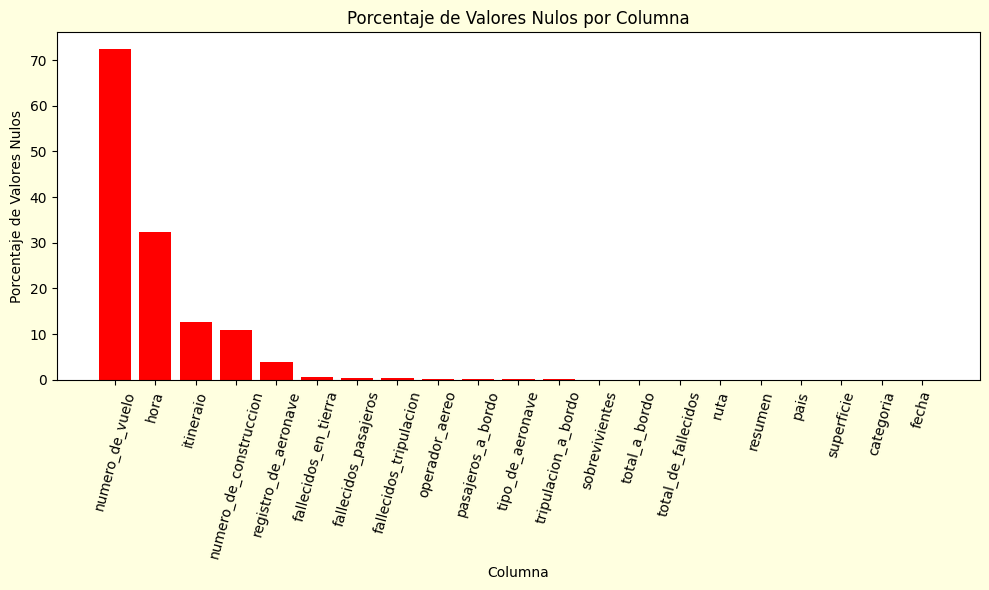

In [257]:
data = {
    'Columna': df1.columns,
    'Valores Nulos': df1.isnull().sum(),
    'Porcentaje Nulos': (df1.isnull().sum() / len(df1)) * 100
}

# Crear un DataFrame a partir del diccionario
df_nulos = pd.DataFrame(data)

# Ordenar el DataFrame por la cantidad de valores nulos en orden descendente
df_nulos = df_nulos.sort_values(by='Valores Nulos', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6), facecolor='lightyellow')
plt.bar(df_nulos['Columna'], df_nulos['Porcentaje Nulos'], color=['red' if val > 0 else 'green' for val in df_nulos['Valores Nulos']])
plt.xticks(rotation=75)
plt.xlabel('Columna')
plt.ylabel('Porcentaje de Valores Nulos')
plt.title('Porcentaje de Valores Nulos por Columna')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [258]:
df1.describe()

,fecha,total_a_bordo,pasajeros_a_bordo,tripulacion_a_bordo,total_de_fallecidos,fallecidos_pasajeros,fallecidos_tripulacion,sobrevivientes
count,4793,4791.000000,4787.000000,4789.000000,4793.000000,4772.000000,4773.000000,4791.000000
mean,1971-09-26 18:05:10.953473888,31.390106,26.877376,4.519524,22.438974,18.944468,3.587262,8.942601
min,1908-09-17 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.000000
25%,1951-11-15 00:00:00,6.000000,3.000000,2.000000,4.000000,1.000000,2.000000,0.000000
50%,1970-12-31 00:00:00,16.000000,12.000000,4.000000,11.000000,7.500000,3.000000,0.000000
75%,1992-07-24 00:00:00,35.000000,30.000000,6.000000,25.000000,21.000000,5.000000,4.000000
max,2021-07-06 00:00:00,644.000000,614.000000,83.000000,583.000000,560.000000,43.000000,516.000000
std,NaN,46.056822,44.035342,3.758072,35.595414,34.067770,3.177315,30.898457


Voy a revisar los Sesgos con Historgramas

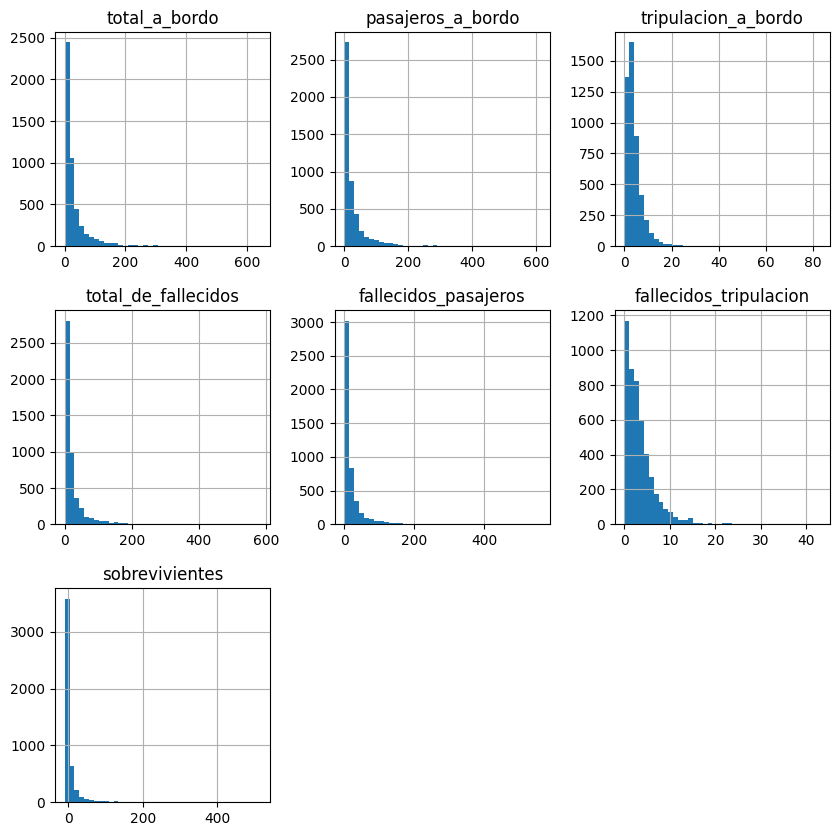

In [260]:
columnas = ['total_a_bordo', 'pasajeros_a_bordo', 'tripulacion_a_bordo', 'total_de_fallecidos', 'fallecidos_pasajeros', 'fallecidos_tripulacion', 'sobrevivientes']
df1[columnas].hist(bins=40, figsize= (10, 10))
# Agregar nombres a los ejes
plt.xlabel("Valores")
plt.ylabel("Frecuencia")


plt.show()
#aca vemos un sesgo hacia la izquierda, 

Ahora tocan los Outliers en un modelo de Boxplot

In [263]:
pd.set_option('display.max_columns', None)

In [265]:
df1.head(1)

,fecha,hora,ruta,operador_aereo,numero_de_vuelo,itineraio,tipo_de_aeronave,registro_de_aeronave,numero_de_construccion,total_a_bordo,pasajeros_a_bordo,tripulacion_a_bordo,total_de_fallecidos,fallecidos_pasajeros,fallecidos_tripulacion,fallecidos_en_tierra,resumen,pais,superficie,categoria,sobrevivientes
0,1908-09-17,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,None,Demonstration,Wright Flyer III,None,1,2.0,1.0,1.0,1.0,1.0,0.0,0,"During a demonstration flight, a U.S. Army fly...",United States,tierra,militar,1.0


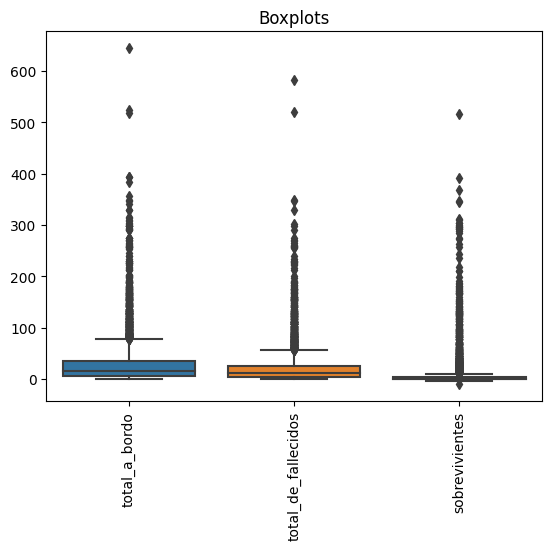

In [266]:
# Graficamos las siguientes variables que podemos utilizar (ya que no tienen valores nulos)

sns.boxplot(data=df1[['total_a_bordo', 'total_de_fallecidos', 'sobrevivientes']])
plt.title('Boxplots')
plt.xticks(rotation=90)
plt.show()
#las 3 tienen Outliers pero el total abordo y total de muertos son mas

Aca vemos los 3 incidentes que implicaron a mas persona 

In [267]:
df1[(df1['total_a_bordo']>500)]

,fecha,hora,ruta,operador_aereo,numero_de_vuelo,itineraio,tipo_de_aeronave,registro_de_aeronave,numero_de_construccion,total_a_bordo,pasajeros_a_bordo,tripulacion_a_bordo,total_de_fallecidos,fallecidos_pasajeros,fallecidos_tripulacion,fallecidos_en_tierra,resumen,pais,superficie,categoria,sobrevivientes
2902,1977-03-27,17:07:00,"Tenerife, Canary Islands",Pan American World Airways / KLM,1736/4805,Tenerife - Las Palmas / Tenerife - Las Palmas,Boeing B-747-121 / Boeing B-747-206B,N736PA/PH-BUF,19643/11 / 20400/157,644.0,614.0,30.0,583.0,560.0,23.0,0,Both aircraft were diverted to Tenerife becaus...,otro,agua,civil,61.0
3341,1985-08-12,18:56:00,"Mt. Osutaka, near Ueno Village, Japan",Japan Air Lines,123,Tokyo - Osaka,Boeing B-747-SR46,JA8119,20783/230,524.0,509.0,15.0,520.0,505.0,15.0,0,The aircraft suffered an aft pressure bulkhead...,Japan,tierra,civil,4.0
4219,1999-07-23,11:25:00,"Tokyo, Japan",All Nippon Airways,61,"Tokyo, Japan - Chitose, Japan",Boeing B-747,JA8966,27442/1066,517.0,503.0,14.0,1.0,0.0,1.0,0,Two minutes after taking off from Haneda Airpo...,Japan,tierra,civil,516.0


In [ ]:
#los 3 datos son correctos

buscamos si en algun vuelo murio mas gente que la que habia en el vuelo

In [268]:
df1[df1['total_de_fallecidos'] > df1['total_a_bordo']]
#pasa resulta y acontese que si, esto es un problemon y toca eliminar estas filas

,fecha,hora,ruta,operador_aereo,numero_de_vuelo,itineraio,tipo_de_aeronave,registro_de_aeronave,numero_de_construccion,total_a_bordo,pasajeros_a_bordo,tripulacion_a_bordo,total_de_fallecidos,fallecidos_pasajeros,fallecidos_tripulacion,fallecidos_en_tierra,resumen,pais,superficie,categoria,sobrevivientes
55,1921-04-06,None,"Point Cook, Australia",Military - Royal Australian Air Force,None,None,Avro 504,H3021,None,0.0,0.0,0.0,2.0,0.0,0.0,0,"Shortly after taking off on a training flight,...",Australia,tierra,militar,-2.0
495,1938-02-09,None,"Guadalupe, Mexico",Mexicana,None,Test flight,Lockheed 10 Electra,XA-BAS,None,0.0,0.0,0.0,2.0,0.0,0.0,0,Crashed on a second test flight.,Mexico,tierra,civil,-2.0
498,1938-02-22,04:45:00,"Pontoise, France",Deutsche Lufthansa,None,"Berlin, Germany - Paris, France",Junkers JU.52,D-APAR,4040,0.0,0.0,0.0,3.0,0.0,0.0,0,The mail plane crashed in fog within a few mil...,France,tierra,civil,-3.0
3038,1979-08-11,13:35:00,"Near Volgograd, Russia",Aeroflot / Aeroflot,7880/7628,Tashkent - Donetsk - Minsk /Chelyabinsk to Kis...,Tupolev TU-134A / Tupolev Tu-134A,65735/65816,2351516 / 05040,168.0,155.0,13.0,178.0,155.0,13.0,0,"Midair collision at 27,200 ft. Separation erro...",Russia,tierra,civil,-10.0
3109,1981-01-14,09:20:00,"Ramstein AFB, West Germany",Military - U.S. Air Force,None,"Ramstein AFB - Oslo, Norway",Lockheed C-130E Hercules,69-6581,4357,9.0,2.0,7.0,11.0,2.0,7.0,0,"Stalled, crashed shortly after taking off.",Germany,tierra,militar,-2.0


In [269]:
df1 = df1[df1['total_de_fallecidos'] <= df1['total_a_bordo']]


marco mis columnas categoricas

In [271]:
#Identificamos columnas catégoricas
columnas_categoriacas = df1.select_dtypes(exclude=[np.number])
print('Columnas catégoricas:\n', list(columnas_categoriacas.columns))


Columnas catégoricas:
 ['fecha', 'hora', 'ruta', 'operador_aereo', 'numero_de_vuelo', 'itineraio', 'tipo_de_aeronave', 'registro_de_aeronave', 'numero_de_construccion', 'fallecidos_en_tierra', 'resumen', 'pais', 'superficie', 'categoria']


Aca termino el analisis de calidad del dato y unas tranformaciones menores

In [272]:
print('La cantidad de accidentes analizada en el dataset es de', df1.shape[0])

La cantidad de accidentes analizada en el dataset es de 4786


Cual es el pais con mas accidentes

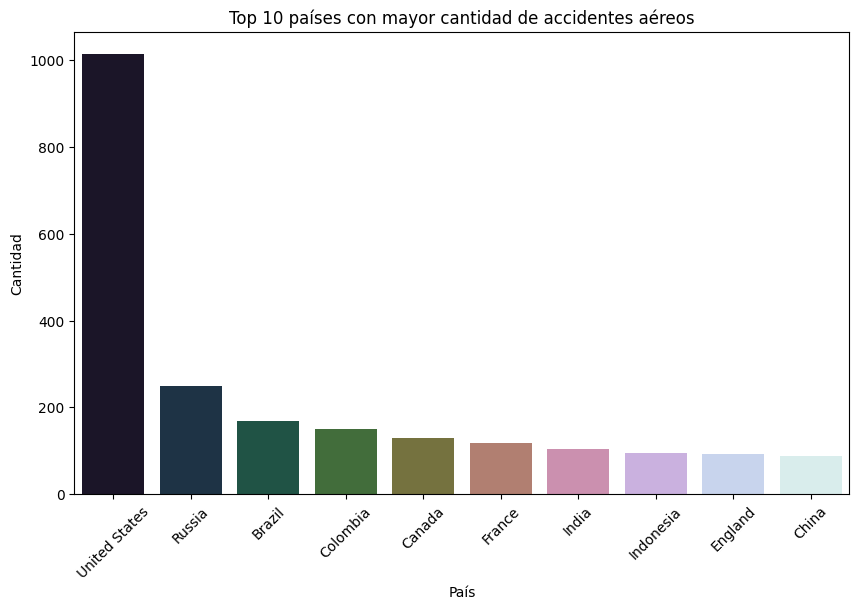

In [274]:
# Filtramos los datos para excluir la categoría 'otro'
filtro = df1[df1['pais'] != 'otro']

# Calculamos el recuento de accidentes por país (tomamos los 10 más representativos)
contador_pais = filtro['pais'].value_counts().head(10)

# Creamos un DataFrame con los datos de recuento
top_paises = pd.DataFrame({'pais': contador_pais.index, 'Accident Count': contador_pais.values})

# Creamos el gráfico de barras utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='pais', y='Accident Count', data=top_paises, palette='cubehelix')
plt.title('Top 10 países con mayor cantidad de accidentes aéreos')
plt.xlabel('País')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

In [276]:
# Observamos los valores

top_paises

,pais,Accident Count
0,United States,1013
1,Russia,249
2,Brazil,169
3,Colombia,150
4,Canada,129
5,France,119
6,India,104
7,Indonesia,95
8,England,94
9,China,88


In [277]:
df1.head(1)

,fecha,hora,ruta,operador_aereo,numero_de_vuelo,itineraio,tipo_de_aeronave,registro_de_aeronave,numero_de_construccion,total_a_bordo,pasajeros_a_bordo,tripulacion_a_bordo,total_de_fallecidos,fallecidos_pasajeros,fallecidos_tripulacion,fallecidos_en_tierra,resumen,pais,superficie,categoria,sobrevivientes
0,1908-09-17,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,None,Demonstration,Wright Flyer III,None,1,2.0,1.0,1.0,1.0,1.0,0.0,0,"During a demonstration flight, a U.S. Army fly...",United States,tierra,militar,1.0


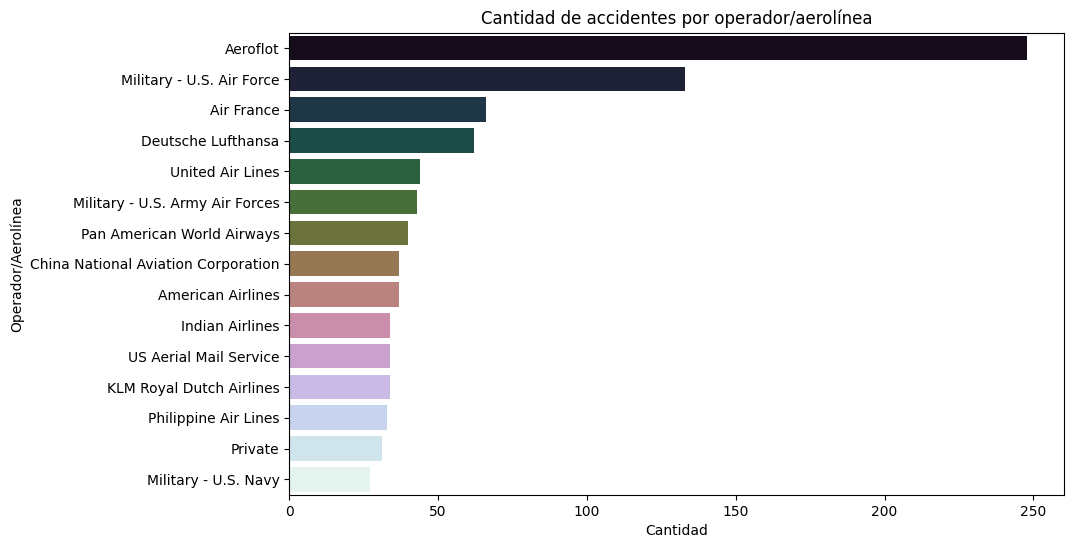

In [278]:
# Calculamos el recuento de accidentes por operador de aerolíneas (tomamos las 15 más representativos)
contador_operador = df1['operador_aereo'].value_counts().head(15)

# Creamos un DataFrame con los datos de recuento
top_operadores = pd.DataFrame({'Operator': contador_operador.index, 'Accident Count': contador_operador.values})

# Creamos el gráfico de columnas horizontales utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Accident Count', y='Operator', data=top_operadores, palette='cubehelix')
plt.title('Cantidad de accidentes por operador/aerolínea')
plt.xlabel('Cantidad')
plt.ylabel('Operador/Aerolínea')
plt.show()

Cuál es la aeronave con mayor cantidad de accidentes

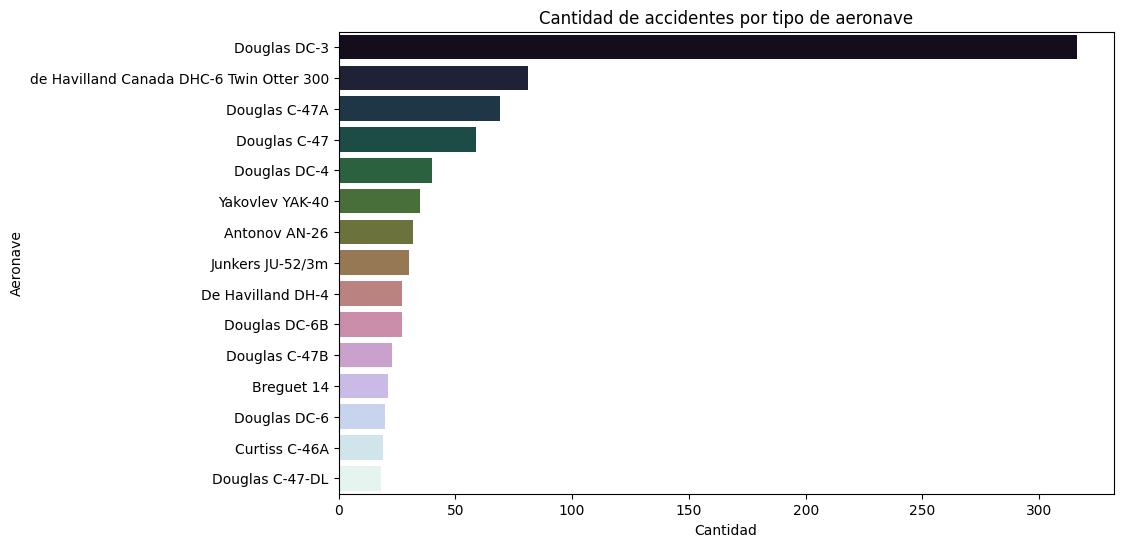

In [280]:
# Calculamos el recuento de accidentes por tipo de aeronave (tomamos las 15 más representativas)
contador_nave = df1['tipo_de_aeronave'].value_counts().head(15)

# Creamos un DataFrame con los datos de recuento 
top_aeronaves = pd.DataFrame({'Aeronave': contador_nave.index, 'contador_accidente': contador_nave.values})

# Creamos el gráfico de columnas horizontales utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='contador_accidente', y='Aeronave', data=top_aeronaves, palette='cubehelix')
plt.title('Cantidad de accidentes por tipo de aeronave')
plt.xlabel('Cantidad')
plt.ylabel('Aeronave')
plt.show()

In [281]:
top_aeronaves

,Aeronave,contador_accidente
0,Douglas DC-3,316
1,de Havilland Canada DHC-6 Twin Otter 300,81
2,Douglas C-47A,69
3,Douglas C-47,59
4,Douglas DC-4,40
5,Yakovlev YAK-40,35
6,Antonov AN-26,32
7,Junkers JU-52/3m,30
8,De Havilland DH-4,27
9,Douglas DC-6B,27


Hay mas accidentes en lo civil o en lo militar?

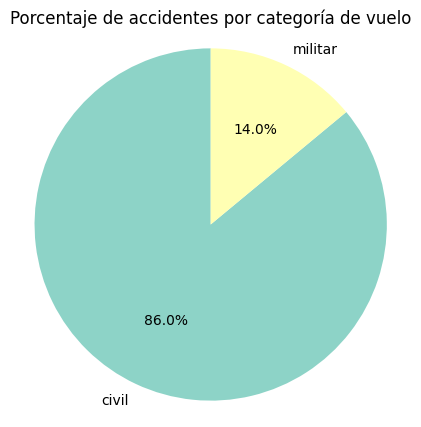

In [283]:
contador_categoria = df1['categoria'].value_counts()

# Define un conjunto de colores personalizado
colores = sns.color_palette('Set3', len(contador_categoria))

# Crea el gráfico circular con Seaborn
plt.figure(figsize=(5, 5))
plt.pie(contador_categoria, labels=contador_categoria.index, autopct='%1.1f%%', startangle=90, colors=colores)
plt.title('Porcentaje de accidentes por categoría de vuelo')
plt.axis('equal')  # Para hacer que el gráfico sea un círculo perfecto
plt.show()

In [285]:
df1.head(1)

,fecha,hora,ruta,operador_aereo,numero_de_vuelo,itineraio,tipo_de_aeronave,registro_de_aeronave,numero_de_construccion,total_a_bordo,pasajeros_a_bordo,tripulacion_a_bordo,total_de_fallecidos,fallecidos_pasajeros,fallecidos_tripulacion,fallecidos_en_tierra,resumen,pais,superficie,categoria,sobrevivientes
0,1908-09-17,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,None,Demonstration,Wright Flyer III,None,1,2.0,1.0,1.0,1.0,1.0,0.0,0,"During a demonstration flight, a U.S. Army fly...",United States,tierra,militar,1.0


In [286]:
# Obtenemos el índice del vuelo con mayor número de fatalidades
indice_max_fatalidades = df1['total_de_fallecidos'].idxmax()

# Obtenemos el número de vuelo, la descripción de lo sucedido y el número de fatalidades correspondientes
num_vuelo_max_fatalidades = df1.loc[indice_max_fatalidades, 'numero_de_vuelo']
descripcion_suceso_max_fatalidades = df1.loc[indice_max_fatalidades, 'resumen']
num_fatalidades_max_fatalidades = df1.loc[indice_max_fatalidades, 'total_de_fallecidos']
operador_max_fatalidades = df1.loc[indice_max_fatalidades, 'operador_aereo']

# Imprimimos los resultados
print("Número de vuelo con mayor número de fatalidades:", num_vuelo_max_fatalidades)
print("Operador involucrado:", operador_max_fatalidades)
print("Número de fatalidades:", num_fatalidades_max_fatalidades)
print("Descripción de lo sucedido:", descripcion_suceso_max_fatalidades)

Número de vuelo con mayor número de fatalidades: 1736/4805
Operador involucrado: Pan American World Airways / KLM
Número de fatalidades: 583.0
Descripción de lo sucedido: Both aircraft were diverted to Tenerife because of a bombing at Las Palmas Airport. After an extended delay,  both planes were instructed to back track up the runway. The KLM plane reached its takeoff point while the Pan Am plane was still on the runway. The Pan Am plane continued up the runway missing the taxiway turnout. There was heavy fog on the runway. The KLM plane began its takeoff roll without permission with the Pan Am plane still on the runway. The controller and Pan Am pilot each radioed a warning to the KLM plane, but were not heard because the simultaneous transmissions interfered with each other.The KLM plane hit the Pan Am plane just as it was taking off. Both planes burst into flames.  KLM 234 + 14 crew,  Pan Am 326 + 9 crew killed. All aboard the KLM plane were killed. The KLM captain was their safety

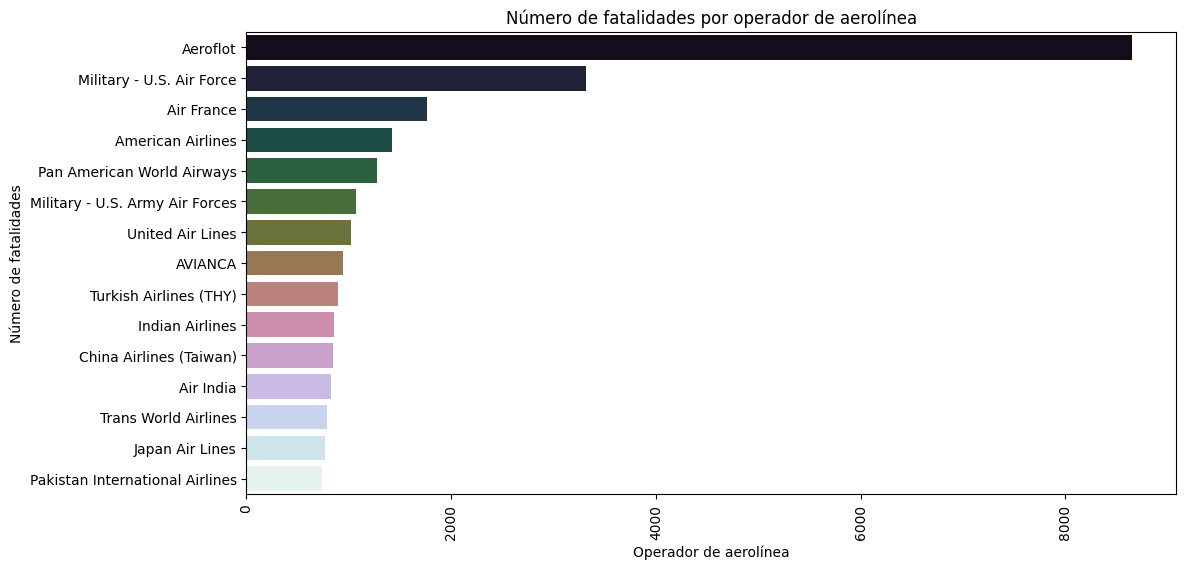

In [287]:
# Agrupamos por operador
fatalidades_por_operador = df1.groupby('operador_aereo')['total_de_fallecidos'].sum().reset_index()

# Ordenamos en forma descendente y tomamos los 15 con mayor cantidad
fatalidades_por_operador = fatalidades_por_operador.nlargest(15, 'total_de_fallecidos')

#Graficamos
plt.figure(figsize=(12, 6))
sns.barplot(y='operador_aereo', x='total_de_fallecidos', data=fatalidades_por_operador, palette='cubehelix')
plt.xlabel('Operador de aerolínea')
plt.ylabel('Número de fatalidades')
plt.title('Número de fatalidades por operador de aerolínea')
plt.xticks(rotation=90)
plt.show()

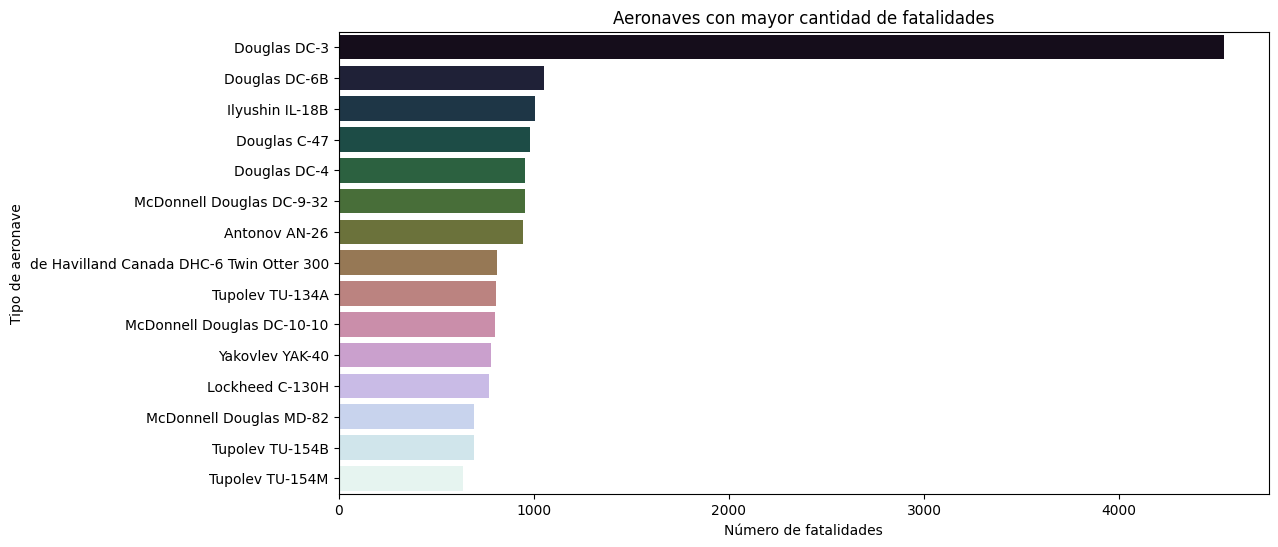

In [288]:
# Agrupamos por tipo de aeronave
fatalidades_por_avion = df1.groupby('tipo_de_aeronave')['total_de_fallecidos'].sum().reset_index()

# Ordenamos en forma descendente y tomamos los 15 con mayor cantidad
top_aircraft_fatalities = fatalidades_por_avion.nlargest(15, 'total_de_fallecidos')

# Graficamos
plt.figure(figsize=(12, 6))
sns.barplot(x='total_de_fallecidos', y='tipo_de_aeronave', data=top_aircraft_fatalities, palette='cubehelix')
plt.xlabel('Número de fatalidades')
plt.ylabel('Tipo de aeronave')
plt.title('Aeronaves con mayor cantidad de fatalidades')
plt.show()


In [289]:
top_aircraft_fatalities

,tipo_de_aeronave,total_de_fallecidos
1094,Douglas DC-3,4538.0
1163,Douglas DC-6B,1051.0
1505,Ilyushin IL-18B,1008.0
998,Douglas C-47,983.0
1146,Douglas DC-4,954.0
1837,McDonnell Douglas DC-9-32,953.0
137,Antonov AN-26,946.0
2309,de Havilland Canada DHC-6 Twin Otter 300,810.0
2156,Tupolev TU-134A,807.0
1801,McDonnell Douglas DC-10-10,804.0


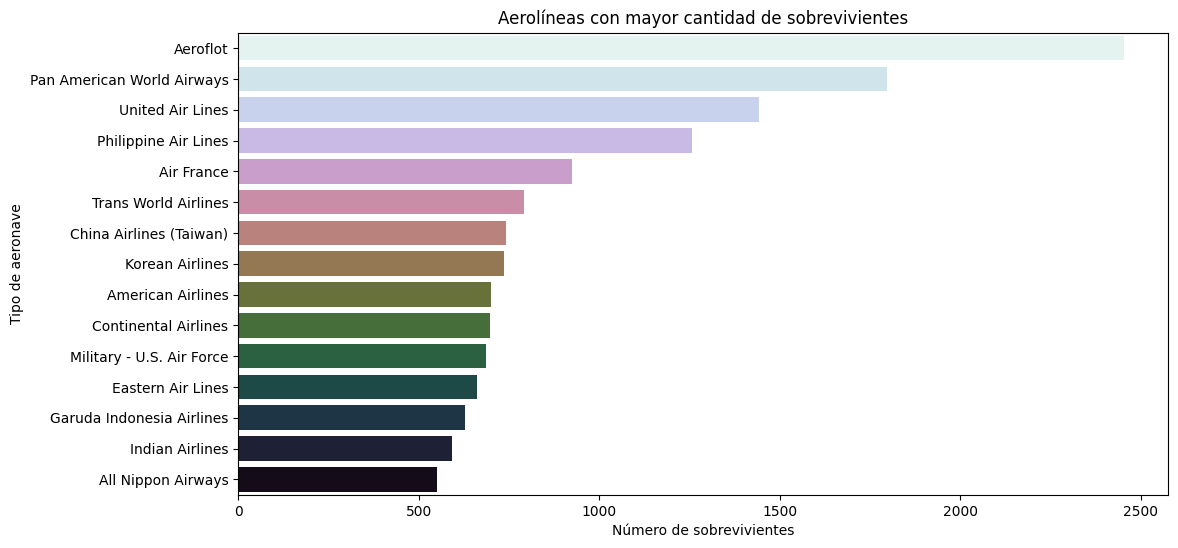

In [293]:
# Calculamos los sobrevivientes por aeronave
sobrevivientes_por_aerolinea = df1.groupby('operador_aereo')['sobrevivientes'].sum().reset_index()

# Dejamos solamente las 15 más seguras
top_sobrevientes_en_aeolineas = sobrevivientes_por_aerolinea.nlargest(15, 'sobrevivientes')

# Graficamos
plt.figure(figsize=(12, 6))
sns.barplot(x='sobrevivientes', y='operador_aereo', data=top_sobrevientes_en_aeolineas, palette='cubehelix_r')
plt.xlabel('Número de sobrevivientes')
plt.ylabel('Tipo de aeronave')
plt.title('Aerolíneas con mayor cantidad de sobrevivientes')
plt.show()

In [294]:
df1.head(1)

,fecha,hora,ruta,operador_aereo,numero_de_vuelo,itineraio,tipo_de_aeronave,registro_de_aeronave,numero_de_construccion,total_a_bordo,pasajeros_a_bordo,tripulacion_a_bordo,total_de_fallecidos,fallecidos_pasajeros,fallecidos_tripulacion,fallecidos_en_tierra,resumen,pais,superficie,categoria,sobrevivientes
0,1908-09-17,17:18:00,"Fort Myer, Virginia",Military - U.S. Army,None,Demonstration,Wright Flyer III,None,1,2.0,1.0,1.0,1.0,1.0,0.0,0,"During a demonstration flight, a U.S. Army fly...",United States,tierra,militar,1.0


Aca saque la relacion pasajeros sobrevivientes para las aeronaves, ya que sobreviva mas gente puede no implicar mayor seguridad, si es mas gente van a morir mas y sobrevivir mas

C:\Users\golhe\AppData\Local\Temp\ipykernel_28332\3722972358.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['accidentados_sobrevivientes'] = (df1['total_de_fallecidos'] / (df1['total_a_bordo'] - df1['sobrevivientes'])).replace([float('inf'), float('-inf')], float('NaN'))


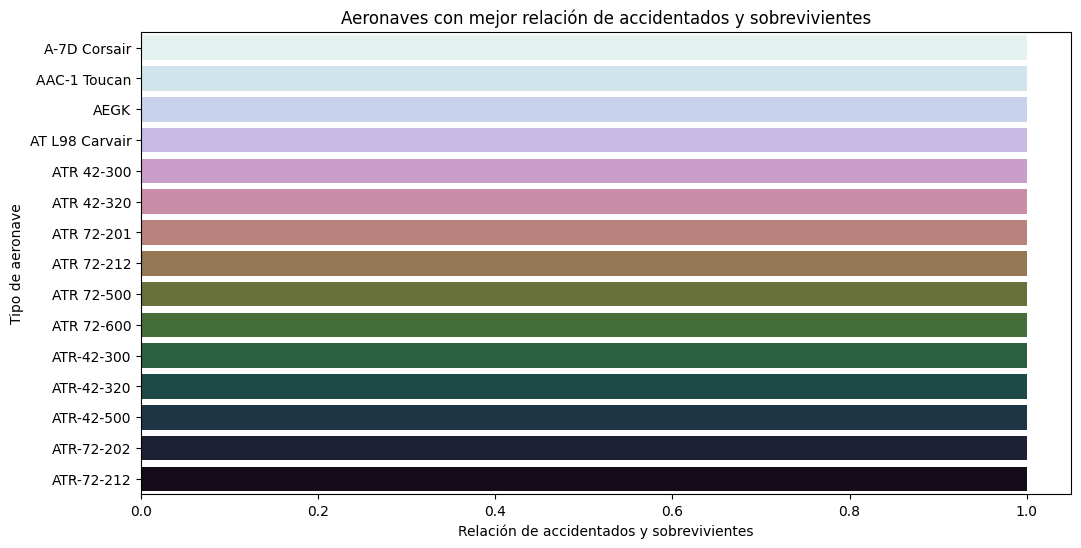

In [328]:
# Calcula la relación entre accidentados y sobrevivientes por aeronave
df1['accidentados_sobrevivientes'] = (df1['total_de_fallecidos'] / (df1['total_a_bordo'] - df1['sobrevivientes'])).replace([float('inf'), float('-inf')], float('NaN'))

# Agrupa por aeronave y calcula la relación promedio
safety_by_aircraft = df1.groupby('tipo_de_aeronave')['accidentados_sobrevivientes'].mean().reset_index()

# Deja solamente las 15 aeronaves con la mejor relación
top_safety_aircraft = safety_by_aircraft.nsmallest(15, 'accidentados_sobrevivientes')

# Grafica
plt.figure(figsize=(12, 6))
sns.barplot(x='accidentados_sobrevivientes', y='tipo_de_aeronave', data=top_safety_aircraft, palette='cubehelix_r')
plt.xlabel('Relación de accidentados y sobrevivientes')
plt.ylabel('Tipo de aeronave')
plt.title('Aeronaves con mejor relación de accidentados y sobrevivientes')
plt.show()

re pensando voy a buscar cuales son los aviones de pasajeros mas seguros

In [297]:
#para que sea de pasajeros necesita ser de mas de 100 personas y despues de 1950

Airbus merece una estrellita michelin parece

C:\Users\golhe\AppData\Local\Temp\ipykernel_28332\3112626573.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['accidentados_sobrevivientes'] = (filtered_df['total_de_fallecidos'] / (filtered_df['total_a_bordo'] - filtered_df['sobrevivientes'])).replace([float('inf'), float('-inf')], float('NaN'))


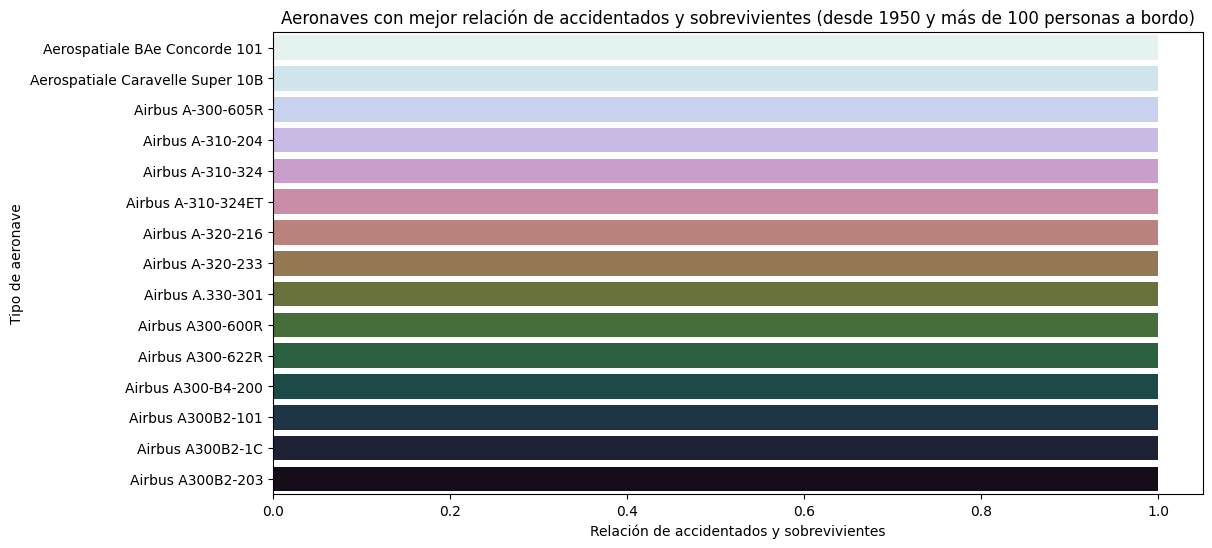

In [329]:
# Filtra los vuelos con más de 100 personas y a partir de 1950
filtered_df = df1[(df1['total_a_bordo'] > 100) & (df1['fecha'].dt.year >= 1950)]

# Calcula la relación entre accidentados y sobrevivientes por aeronave en los datos filtrados
filtered_df['accidentados_sobrevivientes'] = (filtered_df['total_de_fallecidos'] / (filtered_df['total_a_bordo'] - filtered_df['sobrevivientes'])).replace([float('inf'), float('-inf')], float('NaN'))

# Agrupa por aeronave y calcula la relación promedio
safety_by_aircraft = filtered_df.groupby('tipo_de_aeronave')['accidentados_sobrevivientes'].mean().reset_index()

# Deja solamente las 15 aeronaves con la mejor relación
top_safety_aircraft = safety_by_aircraft.nsmallest(15, 'accidentados_sobrevivientes')

# Grafica
plt.figure(figsize=(12, 6))
sns.barplot(x='accidentados_sobrevivientes', y='tipo_de_aeronave', data=top_safety_aircraft, palette='cubehelix_r')
plt.xlabel('Relación de accidentados y sobrevivientes')
plt.ylabel('Tipo de aeronave')
plt.title('Aeronaves con mejor relación de accidentados y sobrevivientes (desde 1950 y más de 100 personas a bordo)')
plt.show()




Analisis a lo largo del Tiempo

La forma de saber cuando es mas seguro es analizar las defunciones por fecha 


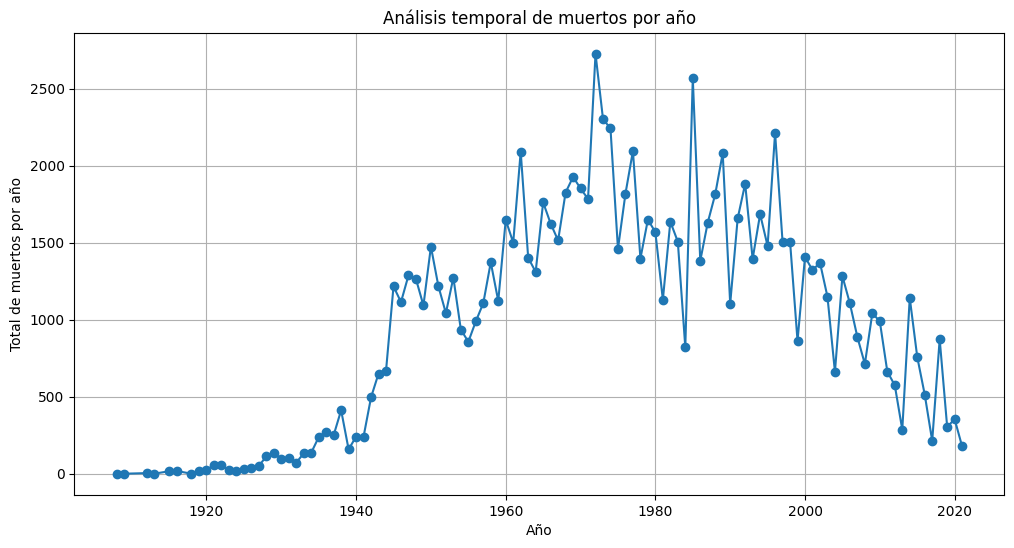

In [302]:
# Agrupa por año y suma la cantidad de muertos en cada año
muertos_por_anio = df1.groupby(df1['fecha'].dt.year)['total_de_fallecidos'].sum()
# Crea un gráfico de línea
plt.figure(figsize=(12, 6))
muertos_por_anio.plot(kind='line', marker='o')
plt.xlabel('Año')
plt.ylabel('Total de muertos por año')
plt.title('Análisis temporal de muertos por año')
plt.grid(True)
plt.show()

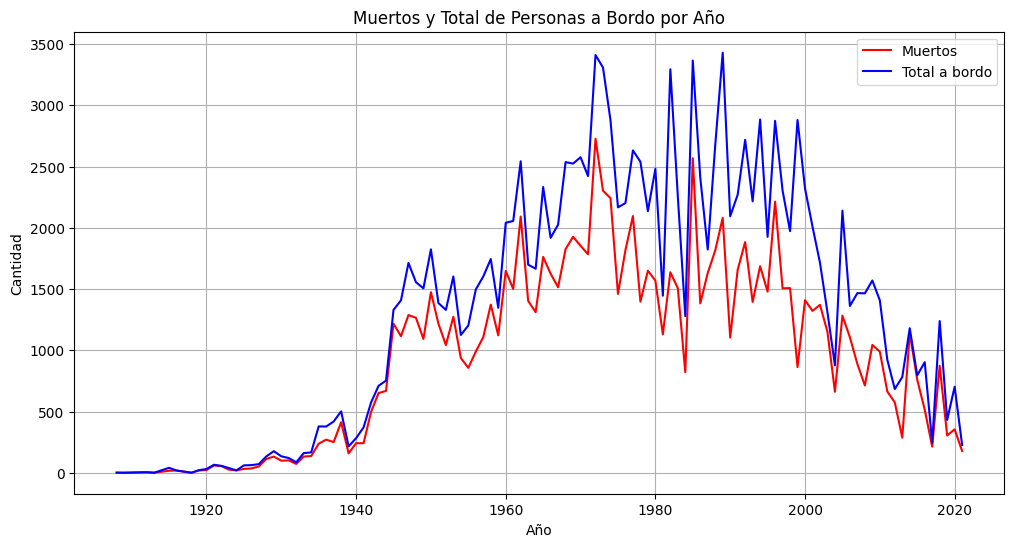

In [303]:
# Agrupa los datos por año y suma los muertos y el total de personas a bordo en cada año
datos_por_anio = df1.groupby(df1['fecha'].dt.year)[['total_de_fallecidos', 'total_a_bordo']].sum()

# Crea un gráfico de línea
plt.figure(figsize=(12, 6))
plt.plot(datos_por_anio.index, datos_por_anio['total_de_fallecidos'], color='red', label='Muertos')
plt.plot(datos_por_anio.index, datos_por_anio['total_a_bordo'], color='blue', label='Total a bordo')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title('Muertos y Total de Personas a Bordo por Año')
plt.legend()
plt.grid(True)
plt.show()

Parece que NO hay una tendencia marcada y tampoco hay una Serie Temporal evidente

C:\Users\golhe\AppData\Local\Temp\ipykernel_28332\801260635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['fecha'] = pd.to_datetime(df1['fecha'])


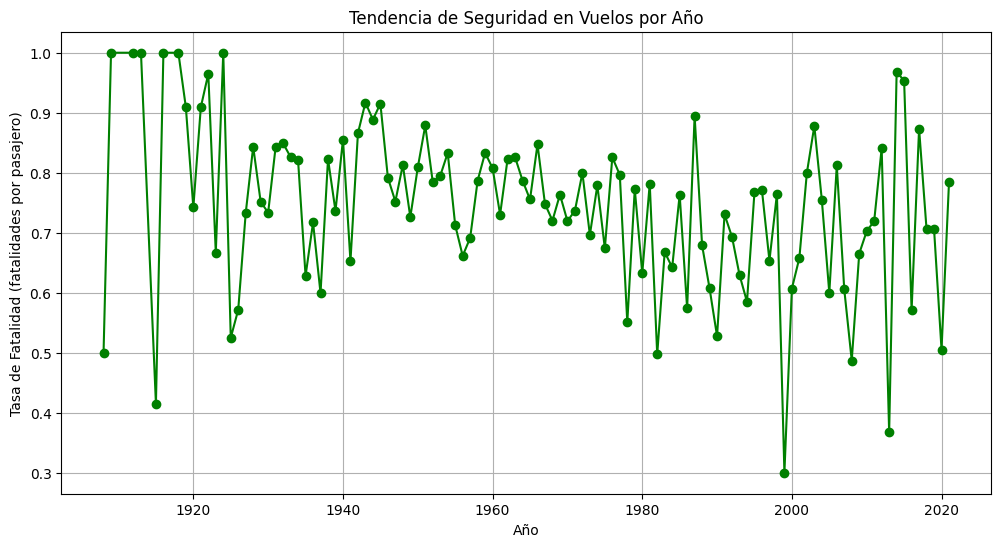

In [304]:
df1['fecha'] = pd.to_datetime(df1['fecha'])

# Agrupa los datos por año y calcula la tasa de fatalidad (fatalidades por pasajero) en cada año
datos_por_anio = df1.groupby(df1['fecha'].dt.year).agg({
    'total_de_fallecidos': 'sum',
    'total_a_bordo': 'sum'
})
datos_por_anio['tasa_fatalidad'] = datos_por_anio['total_de_fallecidos'] / datos_por_anio['total_a_bordo']

# Crea un gráfico de línea para la tasa de fatalidad
plt.figure(figsize=(12, 6))
plt.plot(datos_por_anio.index, datos_por_anio['tasa_fatalidad'], color='green', marker='o')
plt.xlabel('Año')
plt.ylabel('Tasa de Fatalidad (fatalidades por pasajero)')
plt.title('Tendencia de Seguridad en Vuelos por Año')
plt.grid(True)
plt.show()

C:\Users\golhe\AppData\Local\Temp\ipykernel_28332\1258333794.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['mes'] = pd.to_datetime(df1['fecha']).dt.month
C:\Users\golhe\AppData\Local\Temp\ipykernel_28332\1258333794.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['mes'] = df1['mes'].apply(lambda x: calendar.month_name[x])


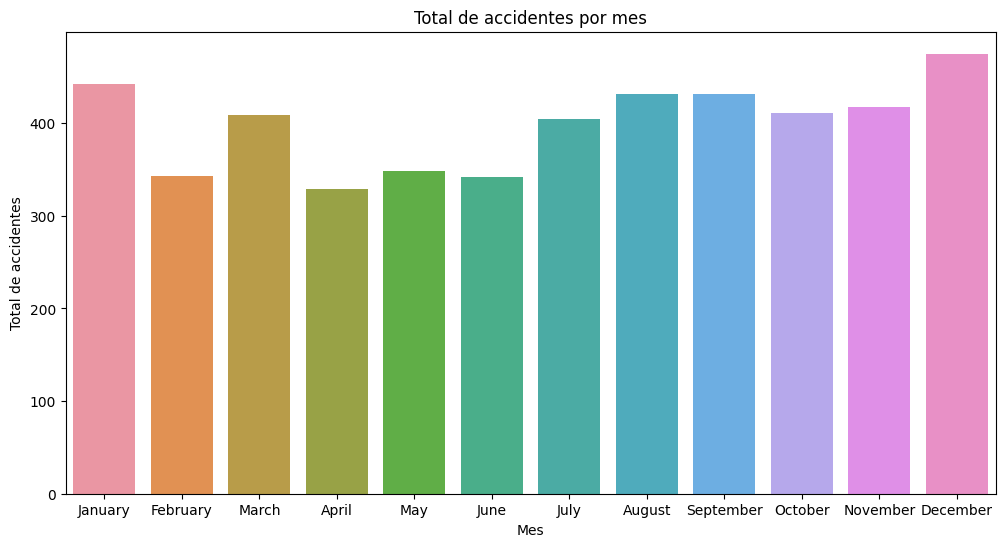

In [308]:
import calendar

# Extraemos el mes de la columna 'fecha'
df1['mes'] = pd.to_datetime(df1['fecha']).dt.month

# Obtenemos los nombres de los meses
df1['mes'] = df1['mes'].apply(lambda x: calendar.month_name[x])

# Agrupamos por mes y contamos la cantidad de accidentes
accidents_by_month = df1.groupby('mes').size().reset_index(name='accident_count')

# Ordenamos los meses de forma cíclica
months_order = list(calendar.month_name)[1:]  # Lista de nombres de los meses sin el primer elemento (vacío)
accidents_by_month['mes'] = pd.Categorical(accidents_by_month['mes'], categories=months_order, ordered=True)
accidents_by_month = accidents_by_month.sort_values('mes')

# Creamos el gráfico de barras con Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=accidents_by_month, x='mes', y='accident_count')

# Establecemos etiquetas de los ejes
plt.xlabel('Mes')
plt.ylabel('Total de accidentes')

# Establecemos título en el gráfico
plt.title('Total de accidentes por mes')

# Mostramos el gráfico
plt.show()

C:\Users\golhe\AppData\Local\Temp\ipykernel_28332\2822109450.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['dia'] = pd.to_datetime(df1['fecha']).dt.dayofweek
C:\Users\golhe\AppData\Local\Temp\ipykernel_28332\2822109450.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['dia'] = df1['dia'].apply(lambda x: calendar.day_name[x])


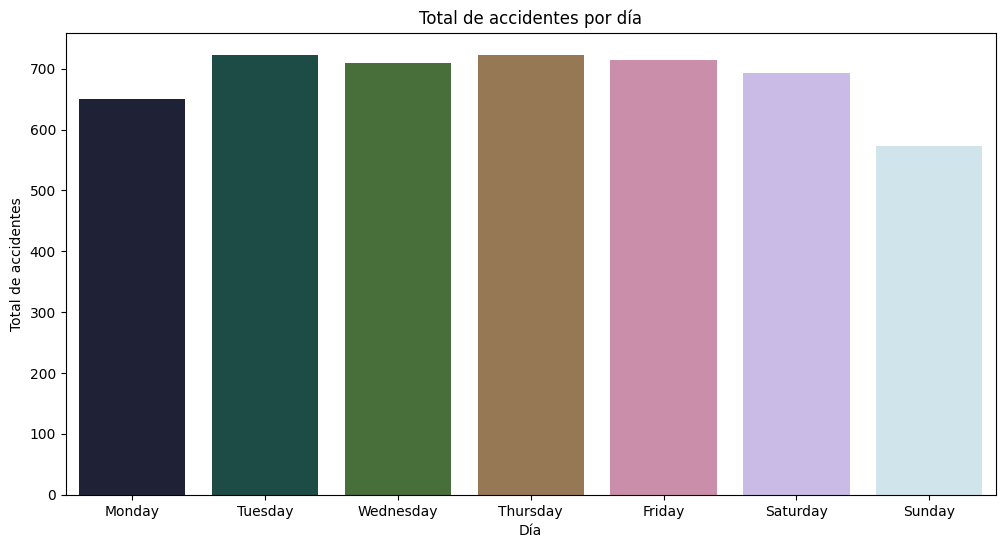

In [313]:
# Extraemos el día de la columna 'fecha'
df1['dia'] = pd.to_datetime(df1['fecha']).dt.dayofweek

# Obtenemos los nombres de los días de la semana
df1['dia'] = df1['dia'].apply(lambda x: calendar.day_name[x])

# Agrupamos por día y contamos la cantidad de accidentes
accidents_by_day = df1.groupby('dia').size().reset_index(name='accident_count')

# Ordenamos los días de la semana de forma cíclica
days_order = list(calendar.day_name)
accidents_by_day['dia'] = pd.Categorical(accidents_by_day['dia'], categories=days_order, ordered=True)
accidents_by_day = accidents_by_day.sort_values('dia')

# Creamos el gráfico de barras con Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=accidents_by_day, x='dia', y='accident_count',palette='cubehelix')

# Establecemos etiquetas de los ejes
plt.xlabel('Día')
plt.ylabel('Total de accidentes')

# Establecemos título del gráfico
plt.title('Total de accidentes por día')

# Mostramos el gráfico
plt.show()



C:\Users\golhe\AppData\Local\Temp\ipykernel_28332\2048553766.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['hora'] = df1['hora'].apply(lambda x: str(x))
C:\Users\golhe\AppData\Local\Temp\ipykernel_28332\2048553766.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['hora'] = df1['hora'].apply(lambda x: re.findall(r'\d+', x)[0] if re.findall(r'\d+', x) else None)
C:\Users\golhe\AppData\Local\Temp\ipykernel_28332\2048553766.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

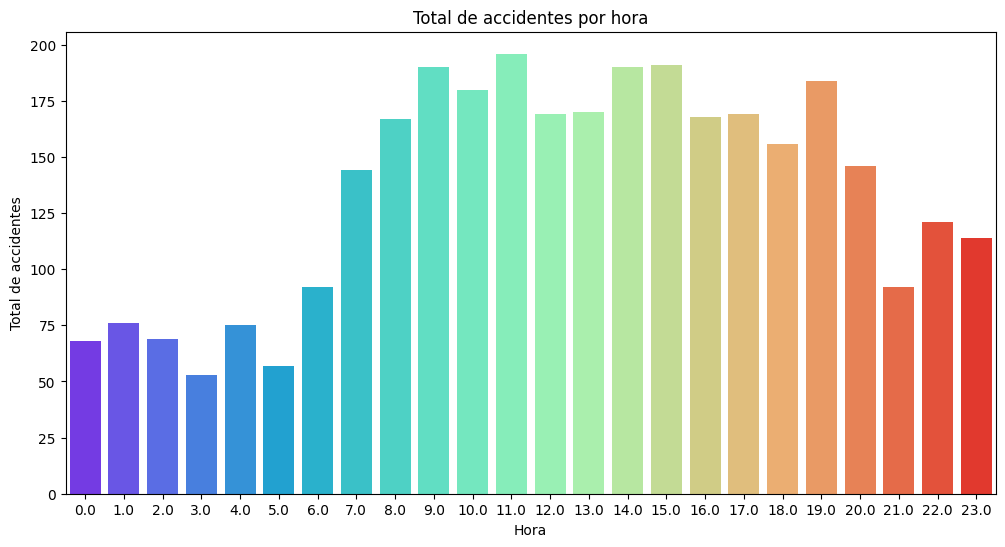

In [332]:
# Convierte la columna 'hora' a string
df1['hora'] = df1['hora'].apply(lambda x: str(x))

# Utilizar expresiones regulares para extraer la hora de la columna 'hora'
df1['hora'] = df1['hora'].apply(lambda x: re.findall(r'\d+', x)[0] if re.findall(r'\d+', x) else None)

# Convertir la columna 'hora' a tipo numérico
df1['hora'] = pd.to_numeric(df1['hora'], errors='coerce')

# Agrupar por hora y contar la cantidad de accidentes
accidentes_por_hora = df1.groupby('hora').size().reset_index(name='accident_count')

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=accidentes_por_hora, x='hora', y='accident_count',palette='rainbow')

# Establecer etiquetas de los ejes
plt.xlabel('Hora')
plt.ylabel('Total de accidentes')

# Establecer título del gráfico
plt.title('Total de accidentes por hora')

# Mostrar el gráfico
plt.show()

In [317]:
df1.to_csv('df1.csv')

In [319]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4786 entries, 0 to 5007
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   fecha                    4786 non-null   datetime64[ns]
 1   hora                     3237 non-null   float64       
 2   ruta                     4786 non-null   object        
 3   operador_aereo           4779 non-null   object        
 4   numero_de_vuelo          1320 non-null   object        
 5   itineraio                4183 non-null   object        
 6   tipo_de_aeronave         4782 non-null   object        
 7   registro_de_aeronave     4604 non-null   object        
 8   numero_de_construccion   4263 non-null   object        
 9   total_a_bordo            4786 non-null   float64       
 10  pasajeros_a_bordo        4782 non-null   float64       
 11  tripulacion_a_bordo      4784 non-null   float64       
 12  total_de_fallecidos      4786 non-null 

In [9]:
df1=pd.read_csv('df1.csv')

KPI's


In [22]:
df1['fecha'] = pd.to_datetime(df1['fecha'])


In [23]:
df1['annio'] = df1['fecha'].dt.year

es del 5% no llega a ser satifactoria

In [36]:
last_decade = df1[(df1['annio'] >= 2010) & (df1['annio'] <= 2020)]

# Filtrar los datos de la década anterior (2003-2012)
previous_decade = df1[(df1['annio'] >= 2000) & (df1['annio'] <= 2010)]

# Calcular la tasa de fatalidad de la tripulación para la última década
suma_fallecidos_last_decade = last_decade['total_de_fallecidos'].sum()
suma_accidentes_last_decade = len(last_decade)
tasa_fatalidad_last_decade = suma_fallecidos_last_decade / suma_accidentes_last_decade

# Calcular la tasa de fatalidad de la tripulación para la década anterior
suma_fallecidos_previous_decade = previous_decade['total_de_fallecidos'].sum()
suma_accidentes_previous_decade = len(previous_decade)
tasa_fatalidad_previous_decade = suma_fallecidos_previous_decade / suma_accidentes_previous_decade
disminucion = tasa_fatalidad_previous_decade - tasa_fatalidad_last_decade

# Comparar las tasas de fatalidad
print(f"Tasa de fatalidad de la tripulación para la última década: {tasa_fatalidad_last_decade}")
print(f"Tasa de fatalidad de la tripulación para la década anterior: {tasa_fatalidad_previous_decade}")

Tasa de fatalidad de la tripulación para la última década: 27.94560669456067
Tasa de fatalidad de la tripulación para la década anterior: 22.353932584269664


In [37]:
disminucion 


-5.591674110291006

In [27]:

# Filtra los datos para la década actual y la década anterior
ultimos_10_anios = df1[(df1['annio'] >= 2010) & (df1['annio'] <= 2020)]
decada_anterior = df1[(df1['annio'] >= 2000) & (df1['annio'] <= 2010)]



Otra forma de calcular la fatalidad de la tripulacion para ver si es satisfactoria

tampoco lo es

In [28]:
# Calcula la tasa de fatalidad de la tripulación para cada década
tasa_fatalidad_ultimos_10_anios = ultimos_10_anios['fallecidos_tripulacion'].sum() / ultimos_10_anios['tripulacion_a_bordo'].sum()
tasa_fatalidad_decada_anterior = decada_anterior['fallecidos_tripulacion'].sum() / decada_anterior['tripulacion_a_bordo'].sum()

# Compara las tasas de fatalidad y verifica si hay una disminución del 10%
diferencia = ((tasa_fatalidad_decada_anterior - tasa_fatalidad_ultimos_10_anios) / tasa_fatalidad_decada_anterior) * 100

if diferencia >= 10:
    print("Se ha logrado una disminución del 10% en la tasa de fatalidad de la tripulación en los últimos 10 años.")
else:
    print("La disminución en la tasa de fatalidad no alcanza el 10% en los últimos 10 años.")

La disminución en la tasa de fatalidad no alcanza el 10% en los últimos 10 años.


In [10]:
diferencia

-2.131265822256874

tasa de fatalidad de los pasajeros 3%

In [12]:
# Calcula la tasa de fatalidad de la tripulación para cada década
fatalidad_ulti = ultimos_10_anios['fallecidos_pasajeros'].sum() / ultimos_10_anios['pasajeros_a_bordo'].sum()
fatalidad_ante = decada_anterior['fallecidos_pasajeros'].sum() / decada_anterior['pasajeros_a_bordo'].sum()

# Compara las tasas de fatalidad y verifica si hay una disminución del 10%
diferencia_porcentual = ((fatalidad_ante - fatalidad_ulti) / fatalidad_ante) * 100

if diferencia_porcentual >= 10:
    print("Se ha logrado una disminución del 10% en la tasa de fatalidad de la tripulación en los últimos 10 años.")
else:
    print("La disminución en la tasa de fatalidad no alcanza el 10% en los últimos 10 años.")

La disminución en la tasa de fatalidad no alcanza el 10% en los últimos 10 años.


In [35]:
diferencia_porcentual

-3.3101855208551183

In [43]:
ultimos_5_anios = df1[df1['fecha'] >= (df1['fecha'].max() - pd.DateOffset(years=5))]
supervivencia_ultimos_5 = ultimos_5_anios['sobrevivientes'].sum() / ultimos_5_anios['total_a_bordo'].sum()

# Calcular supervivencia en la década anterior
decada_anterior = df1[(df1['fecha'] < (df1['fecha'].max() - pd.DateOffset(years=10))) & (df1['fecha'] >= (df1['fecha'].max() - pd.DateOffset(years=20)))]
supervivencia_anterior = decada_anterior['sobrevivientes'].sum() / decada_anterior['total_a_bordo'].sum()

# Calcular la diferencia porcentual
diferencia_porcentual = (supervivencia_ultimos_5 - supervivencia_anterior) *100

print(f"Supervivencia en los últimos 5 años: {supervivencia_ultimos_5:.2%}")
print(f"Supervivencia en la década anterior: {supervivencia_anterior:.2%}")
print(f"Diferencia porcentual: {diferencia_porcentual:.2f}%")

Supervivencia en los últimos 5 años: 35.57%
Supervivencia en la década anterior: 31.41%
Diferencia porcentual: 4.15%


In [343]:
df1.to_csv('df1.csv', index=False)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4786 entries, 0 to 4785
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   fecha                        4786 non-null   object 
 1   hora                         3237 non-null   object 
 2   ruta                         4781 non-null   object 
 3   operador_aereo               4779 non-null   object 
 4   numero_de_vuelo              1320 non-null   object 
 5   itineraio                    4183 non-null   object 
 6   tipo_de_aeronave             4782 non-null   object 
 7   registro_de_aeronave         4604 non-null   object 
 8   numero_de_construccion       4263 non-null   object 
 9   total_a_bordo                4786 non-null   float64
 10  pasajeros_a_bordo            4782 non-null   float64
 11  tripulacion_a_bordo          4784 non-null   float64
 12  total_de_fallecidos          4786 non-null   float64
 13  fallecidos_pasajer

In [3]:
df1=pd.read_csv('df1.csv')